In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
import regex as re

In [6]:
titanic_db = pd.read_csv('../Data/train.csv')


In [7]:
titanic_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
titanic_db.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
change_db=titanic_db.copy(deep=True)


In [10]:
change_db.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
change_db.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
pattern = (
    r'^(?P<LastName>[^,]+),\s*'
    r'(?P<Title>\w+)\.?\s*'
    r'(?P<HusbandName>[^(]+)?'
    r'(?:\((?P<ActualName>[^)]+)\))?'
)

extract= change_db['Name'].str.extract(pattern)
extract['HusbandName'] = extract['HusbandName'].str.strip()

change_db2=pd.concat([change_db,extract],axis=1)
change_db2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,Owen Harris,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,John Bradley,Florence Briggs Thayer
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,Laina,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs,Jacques Heath,Lily May Peel
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr,William Henry,NaN


In [13]:
change_db2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  LastName     891 non-null    object 
 13  Title        891 non-null    object 
 14  HusbandName  875 non-null    object 
 15  ActualName   143 non-null    object 
dtypes: float64(2), int64(5), object(9)
memory usage: 111.5+ KB


In [14]:
change_db2.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
LastName         0
Title            0
HusbandName     16
ActualName     748
dtype: int64

In [15]:
change_db2.loc[change_db2['HusbandName'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S,Hewlett,Mrs,NaN,Mary D Kingcome
66,67,1,2,"Nye, Mrs. (Elizabeth Ramell)",female,29.0,0,0,C.A. 29395,10.5000,F33,S,Nye,Mrs,NaN,Elizabeth Ramell
166,167,1,1,"Chibnall, Mrs. (Edith Martha Bowerman)",female,NaN,0,1,113505,55.0000,E33,S,Chibnall,Mrs,NaN,Edith Martha Bowerman
190,191,1,2,"Pinsky, Mrs. (Rosa)",female,32.0,0,0,234604,13.0000,NaN,S,Pinsky,Mrs,NaN,Rosa
259,260,1,2,"Parrish, Mrs. (Lutie Davis)",female,50.0,0,1,230433,26.0000,NaN,S,Parrish,Mrs,NaN,Lutie Davis
272,273,1,2,"Mellinger, Mrs. (Elizabeth Anne Maidment)",female,41.0,0,1,250644,19.5000,NaN,S,Mellinger,Mrs,NaN,Elizabeth Anne Maidment
327,328,1,2,"Ball, Mrs. (Ada E Hall)",female,36.0,0,0,28551,13.0000,D,S,Ball,Mrs,NaN,Ada E Hall
362,363,0,3,"Barbara, Mrs. (Catherine David)",female,45.0,0,1,2691,14.4542,NaN,C,Barbara,Mrs,NaN,Catherine David
367,368,1,3,"Moussa, Mrs. (Mantoura Boulos)",female,NaN,0,0,2626,7.2292,NaN,C,Moussa,Mrs,NaN,Mantoura Boulos
483,484,1,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S,Turkula,Mrs,NaN,Hedwig


In [16]:
change_db2['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [17]:
change_db2['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [18]:
change_db2.loc[change_db2['Survived']==1, 'Sex'].value_counts()

Sex
female    233
male      109
Name: count, dtype: int64

In [19]:
change_db2.loc[((change_db2['Age'].isnull())),'Sex'].value_counts()

Sex
male      124
female     53
Name: count, dtype: int64

In [20]:
change_db2.loc[((change_db2['Age'].isnull())),'Pclass'].value_counts()

Pclass
3    136
1     30
2     11
Name: count, dtype: int64

In [21]:
change_db2.loc[((change_db2['Age'].isnull())),'Title'].value_counts()

Title
Mr        119
Miss       36
Mrs        17
Master      4
Dr          1
Name: count, dtype: int64

In [22]:
change_db2.loc[((change_db2['Age'].isnull())&(change_db2['Title']=='Dr'))]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
766,767,0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6,NaN,C,Brewe,Dr,Arthur Jackson,NaN


In [23]:
change_db2.loc[((change_db2['Title']=='Dr'))]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
245,246,0,1,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.0000,C78,Q,Minahan,Dr,William Edward,NaN
317,318,0,2,"Moraweck, Dr. Ernest",male,54.0,0,0,29011,14.0000,NaN,S,Moraweck,Dr,Ernest,NaN
398,399,0,2,"Pain, Dr. Alfred",male,23.0,0,0,244278,10.5000,NaN,S,Pain,Dr,Alfred,NaN
632,633,1,1,"Stahelin-Maeglin, Dr. Max",male,32.0,0,0,13214,30.5000,B50,C,Stahelin-Maeglin,Dr,Max,NaN
660,661,1,1,"Frauenthal, Dr. Henry William",male,50.0,2,0,PC 17611,133.6500,NaN,S,Frauenthal,Dr,Henry William,NaN
766,767,0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6000,NaN,C,Brewe,Dr,Arthur Jackson,NaN
796,797,1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S,Leader,Dr,Alice,Farnham


There are 7 `Dr.` passengers, where **1** is *female* and 6 are *male* Dr. passengers. 


In [24]:
change_db2.loc[((change_db2['Sex']=='male')&(change_db2['Title']=='Dr'))].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,6.000000,6.000000,6.000000,5.000000,6.000000,6.0,6.000000
mean,504.000000,0.333333,1.333333,40.600000,0.666667,0.0,53.041667
std,211.018483,0.516398,0.516398,12.876335,1.032796,0.0,48.757506
min,246.000000,0.000000,1.000000,23.000000,0.000000,0.0,10.500000
25%,338.250000,0.000000,1.000000,32.000000,0.000000,0.0,18.125000
50%,516.000000,0.000000,1.000000,44.000000,0.000000,0.0,35.050000
75%,654.000000,0.750000,1.750000,50.000000,1.500000,0.0,77.400000
max,767.000000,1.000000,2.000000,54.000000,2.000000,0.0,133.650000


In [25]:
change_db_cleaned=change_db2.copy(deep=True)

For final cleaning created a table `change_db_cleaned` by creating a copy of `change_db2`

In [26]:
change_db_cleaned.loc[((change_db2['Age'].isnull())&(change_db2['Title']=='Dr')),'Age']=41

In [27]:
change_db_cleaned.loc[((change_db2['Sex']=='male')&(change_db2['Title']=='Dr'))].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.0,6.000000
mean,504.000000,0.333333,1.333333,40.666667,0.666667,0.0,53.041667
std,211.018483,0.516398,0.516398,11.518102,1.032796,0.0,48.757506
min,246.000000,0.000000,1.000000,23.000000,0.000000,0.0,10.500000
25%,338.250000,0.000000,1.000000,34.250000,0.000000,0.0,18.125000
50%,516.000000,0.000000,1.000000,42.500000,0.000000,0.0,35.050000
75%,654.000000,0.750000,1.750000,48.500000,1.500000,0.0,77.400000
max,767.000000,1.000000,2.000000,54.000000,2.000000,0.0,133.650000


`Dr.` title (1 null): Impute with **40.6** rounding it to **41**— mean age of male Dr. passengers.

In [28]:
change_db2.loc[((change_db2['Age'].isnull())&(change_db2['Title']=='Master'))]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C,Moubarek,Master,Gerios,NaN
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,NaN,S,Sage,Master,Thomas Henry,NaN
176,177,0,3,"Lefebre, Master. Henry Forbes",male,NaN,3,1,4133,25.4667,NaN,S,Lefebre,Master,Henry Forbes,NaN
709,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C,Moubarek,Master,Halim Gonios,"""William George"""


`Master` title of 3rd class has all 4 null values of age

In [29]:
change_db2.loc[((change_db2['Title']=='Master')&(change_db2['Pclass']==3))].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,28.000000,28.000000,28.0,24.000000,28.000000,28.000000,28.000000
mean,388.285714,0.392857,3.0,5.350833,2.928571,1.357143,28.177232
std,314.309927,0.497347,0.0,3.593608,1.942289,0.558721,13.898033
min,8.000000,0.000000,3.0,0.420000,0.000000,0.000000,8.516700
25%,151.500000,0.000000,3.0,2.000000,1.000000,1.000000,15.900000
50%,270.500000,0.000000,3.0,4.000000,3.500000,1.000000,28.512500
75%,761.000000,1.000000,3.0,9.000000,4.000000,2.000000,33.462500
max,870.000000,1.000000,3.0,12.000000,8.000000,2.000000,69.550000


In [30]:
change_db_cleaned.loc[(change_db2['Title']=='Master')&(change_db2['Age'].isnull()),'Age']=5

In [31]:
change_db_cleaned.loc[((change_db2['Title']=='Master')&(change_db2['Pclass']==3))].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,28.000000,28.000000,28.0,28.000000,28.000000,28.000000,28.000000
mean,388.285714,0.392857,3.0,5.300714,2.928571,1.357143,28.177232
std,314.309927,0.497347,0.0,3.319105,1.942289,0.558721,13.898033
min,8.000000,0.000000,3.0,0.420000,0.000000,0.000000,8.516700
25%,151.500000,0.000000,3.0,2.750000,1.000000,1.000000,15.900000
50%,270.500000,0.000000,3.0,5.000000,3.500000,1.000000,28.512500
75%,761.000000,1.000000,3.0,8.250000,4.000000,2.000000,33.462500
max,870.000000,1.000000,3.0,12.000000,8.000000,2.000000,69.550000


`Master` in 3rd class (4 nulls): Impute with **5.3** round off to **5** — mean age of Master passengers in 3rd class.


In [32]:
change_db2.loc[(change_db2['Title']=='Mrs')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,John Bradley,Florence Briggs Thayer
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs,Jacques Heath,Lily May Peel
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Johnson,Mrs,Oscar W,Elisabeth Vilhelmina Berg
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Nasser,Mrs,Nicholas,Adele Achem
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S,Hewlett,Mrs,NaN,Mary D Kingcome
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,Beckwith,Mrs,Richard Leonard,Sallie Monypeny
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C,Abelson,Mrs,Samuel,Hannah Wizosky
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,Potter,Mrs,Thomas Jr,Lily Alexenia Wilson
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S,Shelley,Mrs,William,Imanita Parrish Hall


In [33]:
change_db2.loc[(change_db2['Title']=='Mrs'),'Age'].describe()

count    108.000000
mean      35.898148
std       11.433628
min       14.000000
25%       27.750000
50%       35.000000
75%       44.000000
max       63.000000
Name: Age, dtype: float64

In [34]:
change_db2.loc[(change_db2['Title']=='Mrs'),'Age'].median()

np.float64(35.0)

In [35]:
change_db2.loc[((change_db2['Age'].notnull())&(change_db2['Title']=='Mrs')),'Pclass'].value_counts()

Pclass
2    41
1    34
3    33
Name: count, dtype: int64

In [36]:
change_db2.loc[((change_db2['Age'].isnull())&(change_db2['Title']=='Mrs')),'Pclass'].value_counts()

Pclass
3    9
1    8
Name: count, dtype: int64

In [37]:
change_db2.loc[((change_db2['Pclass']==1)&(change_db2['Title']=='Mrs')),'Age'].describe()

count    34.000000
mean     40.882353
std      12.643754
min      17.000000
25%      35.000000
50%      41.500000
75%      50.750000
max      62.000000
Name: Age, dtype: float64

In [38]:
change_db2.loc[((change_db2['Pclass']==1)&(change_db2['Title']=='Mrs')),'Age'].median()

np.float64(41.5)

In [39]:
change_db2.loc[(change_db2['Pclass']==1)&(change_db2['Title']=='Mrs'),['Pclass','Name','Age','SibSp','Parch','Fare']].sort_values('SibSp')

,Pclass,Name,Age,SibSp,Parch,Fare
194,1,"Brown, Mrs. James Joseph (Margaret Tobin)",44.0,0,0,27.7208
166,1,"Chibnall, Mrs. (Edith Martha Bowerman)",NaN,0,1,55.0000
268,1,"Graham, Mrs. William Thompson (Edith Junkins)",58.0,0,1,153.4625
256,1,"Thorne, Mrs. Gertrude Maybelle",NaN,0,0,79.2000
299,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",50.0,0,1,247.5208
523,1,"Hippach, Mrs. Louis Albert (Ida Sophia Fischer)",44.0,0,1,57.9792
829,1,"Stone, Mrs. George Nelson (Martha Evelyn)",62.0,0,0,80.0000
779,1,"Robert, Mrs. Edward Scott (Elisabeth Walton Mc...",43.0,0,1,211.3375
879,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",56.0,0,1,83.1583
862,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",48.0,0,0,25.9292


In [40]:
change_db2.loc[(change_db2['Pclass']==1)&(change_db2['Title']=='Mrs')&(change_db2['SibSp']==0),['Pclass','Name','Age','SibSp','Parch','Fare']]

,Pclass,Name,Age,SibSp,Parch,Fare
166,1,"Chibnall, Mrs. (Edith Martha Bowerman)",NaN,0,1,55.0000
194,1,"Brown, Mrs. James Joseph (Margaret Tobin)",44.0,0,0,27.7208
256,1,"Thorne, Mrs. Gertrude Maybelle",NaN,0,0,79.2000
268,1,"Graham, Mrs. William Thompson (Edith Junkins)",58.0,0,1,153.4625
299,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",50.0,0,1,247.5208
523,1,"Hippach, Mrs. Louis Albert (Ida Sophia Fischer)",44.0,0,1,57.9792
779,1,"Robert, Mrs. Edward Scott (Elisabeth Walton Mc...",43.0,0,1,211.3375
829,1,"Stone, Mrs. George Nelson (Martha Evelyn)",62.0,0,0,80.0000
862,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",48.0,0,0,25.9292
879,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",56.0,0,1,83.1583


In [41]:
change_db2.loc[(change_db2['Pclass']==1)&(change_db2['Title']=='Mrs')&(change_db2['SibSp']==0)&(change_db2['Parch']==0),['Pclass','Name','Age','SibSp','Parch','Fare']]

,Pclass,Name,Age,SibSp,Parch,Fare
194,1,"Brown, Mrs. James Joseph (Margaret Tobin)",44.0,0,0,27.7208
256,1,"Thorne, Mrs. Gertrude Maybelle",NaN,0,0,79.2000
829,1,"Stone, Mrs. George Nelson (Martha Evelyn)",62.0,0,0,80.0000
862,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",48.0,0,0,25.9292


In [42]:
change_db2.loc[(change_db2['Pclass']==1)&(change_db2['Title']=='Mrs')&(change_db2['SibSp']==0)&(change_db2['Parch']==0),['Pclass','Name','Age','SibSp','Parch','Fare']].describe()

,Pclass,Age,SibSp,Parch,Fare
count,4.0,3.000000,4.0,4.0,4.000000
mean,1.0,51.333333,0.0,0.0,53.212500
std,0.0,9.451631,0.0,0.0,30.480188
min,1.0,44.000000,0.0,0.0,25.929200
25%,1.0,46.000000,0.0,0.0,27.272900
50%,1.0,48.000000,0.0,0.0,53.460400
75%,1.0,55.000000,0.0,0.0,79.400000
max,1.0,62.000000,0.0,0.0,80.000000


In [43]:
change_db_cleaned.loc[(change_db_cleaned['Pclass']==1)&(change_db_cleaned['Title']=='Mrs')&(change_db_cleaned['SibSp']==0)&(change_db_cleaned['Parch']==0)&(change_db_cleaned['Age'].isnull()),['Age']]=57

In [44]:
change_db_cleaned.loc[(change_db_cleaned['Pclass']==1)&(change_db_cleaned['Title']=='Mrs')&(change_db_cleaned['SibSp']==0)&(change_db_cleaned['Parch']==0),['Age']].describe()

,Age
count,4.000000
mean,52.750000
std,8.220908
min,44.000000
25%,47.000000
50%,52.500000
75%,58.250000
max,62.000000


`Mrs` title in `1st class` and has 0 -`SibSp` and 0-`Parch` **(1 null)**: Impute with **57**- middle value between mean age of group and max age of group. 

In [45]:
change_db2.loc[(change_db2['Pclass']==1)&(change_db2['Title']=='Mrs')&(change_db2['SibSp']==0)&(change_db2['Parch']==1),['Pclass','Name','Age','SibSp','Parch','Fare','Cabin']]

,Pclass,Name,Age,SibSp,Parch,Fare,Cabin
166,1,"Chibnall, Mrs. (Edith Martha Bowerman)",NaN,0,1,55.0000,E33
268,1,"Graham, Mrs. William Thompson (Edith Junkins)",58.0,0,1,153.4625,C125
299,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",50.0,0,1,247.5208,B58 B60
523,1,"Hippach, Mrs. Louis Albert (Ida Sophia Fischer)",44.0,0,1,57.9792,B18
779,1,"Robert, Mrs. Edward Scott (Elisabeth Walton Mc...",43.0,0,1,211.3375,B3
879,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",56.0,0,1,83.1583,C50


In [46]:
change_db2[change_db2['Cabin']=='E33']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
166,167,1,1,"Chibnall, Mrs. (Edith Martha Bowerman)",female,NaN,0,1,113505,55.0,E33,S,Chibnall,Mrs,NaN,Edith Martha Bowerman
356,357,1,1,"Bowerman, Miss. Elsie Edith",female,22.0,0,1,113505,55.0,E33,S,Bowerman,Miss,Elsie Edith,NaN


In [47]:
change_db2[change_db2['Cabin']=='B58 B60']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C,Baxter,Mr,Quigg Edmond,NaN
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C,Baxter,Mrs,James,Helene DeLaudeniere Chaput


In [48]:
change_db2.loc[(change_db2['Pclass']==1)&(change_db2['Title']=='Mrs')&(change_db2['SibSp']==0)&(change_db2['Parch']==1),['Pclass','Name','Age','SibSp','Parch','Fare']].describe()

,Pclass,Age,SibSp,Parch,Fare
count,6.0,5.000000,6.0,6.0,6.000000
mean,1.0,50.200000,0.0,1.0,134.743050
std,0.0,6.797058,0.0,0.0,82.278281
min,1.0,43.000000,0.0,1.0,55.000000
25%,1.0,44.000000,0.0,1.0,64.273975
50%,1.0,50.000000,0.0,1.0,118.310400
75%,1.0,56.000000,0.0,1.0,196.868750
max,1.0,58.000000,0.0,1.0,247.520800


In [49]:
change_db_cleaned.loc[(change_db_cleaned['Pclass']==1)&(change_db_cleaned['Title']=='Mrs')&(change_db_cleaned['SibSp']==0)&(change_db_cleaned['Parch']==1)&(change_db_cleaned['Age'].isnull()),['Age']]=50

In [50]:
change_db_cleaned.loc[(change_db_cleaned['Pclass']==1)&(change_db_cleaned['Title']=='Mrs')&(change_db_cleaned['SibSp']==0)&(change_db_cleaned['Parch']==1),['Age']].describe()

,Age
count,6.000000
mean,50.166667
std,6.080022
min,43.000000
25%,45.500000
50%,50.000000
75%,54.500000
max,58.000000


`Mrs` title in `1st class` and has 0 -`SibSp` and 1-`Parch` **(1 null)**: Impute with **50.2** round off to 50- mean age of group and comparing with a person from this group who is having a son of same age group as her daughters' age. 

In [51]:
change_db2.loc[(change_db2['Pclass']==1)&(change_db2['Title']=='Mrs')&(change_db2['SibSp']==1),['Pclass','Name','Age','SibSp','Parch','Fare']].sort_values('Parch')

,Pclass,Name,Age,SibSp,Parch,Fare
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000
31,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",NaN,1,0,146.5208
52,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",49.0,1,0,76.7292
151,1,"Pears, Mrs. Thomas (Edith Wearne)",22.0,1,0,66.6000
230,1,"Harris, Mrs. Henry Birkhardt (Irene Wallach)",35.0,1,0,83.4750
291,1,"Bishop, Mrs. Dickinson H (Helen Walton)",19.0,1,0,91.0792
307,1,"Penasco y Castellana, Mrs. Victor de Satode (M...",17.0,1,0,108.9000
334,1,"Frauenthal, Mrs. Henry William (Clara Heinshei...",NaN,1,0,133.6500
366,1,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",60.0,1,0,75.2500


In [52]:
change_db2.loc[(change_db2['Pclass']==1)&(change_db2['Title']=='Mrs')&(change_db2['SibSp']==1)&(change_db2['Parch']==0)].sort_values('Age')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
307,308,1,1,"Penasco y Castellana, Mrs. Victor de Satode (M...",female,17.0,1,0,PC 17758,108.9000,C65,C,Penasco y Castellana,Mrs,Victor de Satode,Maria Josefa Perez de Soto y Vallejo
781,782,1,1,"Dick, Mrs. Albert Adrian (Vera Gillespie)",female,17.0,1,0,17474,57.0000,B20,S,Dick,Mrs,Albert Adrian,Vera Gillespie
700,701,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.5250,C62 C64,C,Astor,Mrs,John Jacob,Madeleine Talmadge Force
291,292,1,1,"Bishop, Mrs. Dickinson H (Helen Walton)",female,19.0,1,0,11967,91.0792,B49,C,Bishop,Mrs,Dickinson H,Helen Walton
151,152,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.0,1,0,113776,66.6000,C2,S,Pears,Mrs,Thomas,Edith Wearne
809,810,1,1,"Chambers, Mrs. Norman Campbell (Bertha Griggs)",female,33.0,1,0,113806,53.1000,E8,S,Chambers,Mrs,Norman Campbell,Bertha Griggs
230,231,1,1,"Harris, Mrs. Henry Birkhardt (Irene Wallach)",female,35.0,1,0,36973,83.4750,C83,S,Harris,Mrs,Henry Birkhardt,Irene Wallach
383,384,1,1,"Holverson, Mrs. Alexander Oskar (Mary Aline To...",female,35.0,1,0,113789,52.0000,NaN,S,Holverson,Mrs,Alexander Oskar,Mary Aline Towner
486,487,1,1,"Hoyt, Mrs. Frederick Maxfield (Jane Anne Forby)",female,35.0,1,0,19943,90.0000,C93,S,Hoyt,Mrs,Frederick Maxfield,Jane Anne Forby
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs,Jacques Heath,Lily May Peel


In [53]:
change_db2.loc[(change_db2['Pclass']==1)&(change_db2['Title']=='Mrs')&(change_db2['SibSp']==1)&(change_db2['Parch']==0),['Pclass','Name','Age','SibSp','Parch','Fare']].describe()

,Pclass,Age,SibSp,Parch,Fare
count,23.0,17.000000,23.0,23.0,23.000000
mean,1.0,35.823529,1.0,0.0,84.038043
std,0.0,13.933930,0.0,0.0,40.162538
min,1.0,17.000000,1.0,0.0,51.862500
25%,1.0,22.000000,1.0,0.0,56.450000
50%,1.0,35.000000,1.0,0.0,76.729200
75%,1.0,49.000000,1.0,0.0,89.552100
max,1.0,60.000000,1.0,0.0,227.525000


In [54]:
array=change_db2.loc[(change_db2['Pclass']==1)&(change_db2['Title']=='Mrs')&(change_db2['SibSp']==1)&(change_db2['Parch']==0),'HusbandName'].unique()

In [55]:
change_db2.loc[(change_db2['HusbandName'].isin(array))&(change_db2['Pclass']==1),['Pclass','Name','Age','Title', 'SibSp','Parch','Fare','HusbandName']].sort_values(['HusbandName','Age'])

,Pclass,Name,Age,Title,SibSp,Parch,Fare,HusbandName
781,1,"Dick, Mrs. Albert Adrian (Vera Gillespie)",17.0,Mrs,1,0,57.0000,Albert Adrian
690,1,"Dick, Mr. Albert Adrian",31.0,Mr,1,0,57.0000,Albert Adrian
383,1,"Holverson, Mrs. Alexander Oskar (Mary Aline To...",35.0,Mrs,1,0,52.0000,Alexander Oskar
35,1,"Holverson, Mr. Alexander Oskar",42.0,Mr,1,0,52.0000,Alexander Oskar
291,1,"Bishop, Mrs. Dickinson H (Helen Walton)",19.0,Mrs,1,0,91.0792,Dickinson H
484,1,"Bishop, Mr. Dickinson H",25.0,Mr,1,0,91.0792,Dickinson H
34,1,"Meyer, Mr. Edgar Joseph",28.0,Mr,1,0,82.1708,Edgar Joseph
375,1,"Meyer, Mrs. Edgar Joseph (Leila Saks)",NaN,Mrs,1,0,82.1708,Edgar Joseph
712,1,"Taylor, Mr. Elmer Zebley",48.0,Mr,1,0,52.0000,Elmer Zebley
669,1,"Taylor, Mrs. Elmer Zebley (Juliet Cummins Wright)",NaN,Mrs,1,0,52.0000,Elmer Zebley


In [56]:
change_db2.loc[(change_db2['Pclass']==1)&(change_db2['Title']=='Mrs')&(change_db2['SibSp']==1)&(change_db2['Parch']==0),['Pclass','Name','Age','SibSp','Parch','Fare','Cabin']].sort_values('Age')

,Pclass,Name,Age,SibSp,Parch,Fare,Cabin
307,1,"Penasco y Castellana, Mrs. Victor de Satode (M...",17.0,1,0,108.9000,C65
781,1,"Dick, Mrs. Albert Adrian (Vera Gillespie)",17.0,1,0,57.0000,B20
700,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",18.0,1,0,227.5250,C62 C64
291,1,"Bishop, Mrs. Dickinson H (Helen Walton)",19.0,1,0,91.0792,B49
151,1,"Pears, Mrs. Thomas (Edith Wearne)",22.0,1,0,66.6000,C2
809,1,"Chambers, Mrs. Norman Campbell (Bertha Griggs)",33.0,1,0,53.1000,E8
230,1,"Harris, Mrs. Henry Birkhardt (Irene Wallach)",35.0,1,0,83.4750,C83
383,1,"Holverson, Mrs. Alexander Oskar (Mary Aline To...",35.0,1,0,52.0000,NaN
486,1,"Hoyt, Mrs. Frederick Maxfield (Jane Anne Forby)",35.0,1,0,90.0000,C93
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,C123


In [57]:
change_db_cleaned.loc[change_db_cleaned['PassengerId']==376,'Age']=22

In [58]:
change_db_cleaned.loc[change_db_cleaned['PassengerId']==670,'Age']=42

In [59]:
change_db_cleaned.loc[change_db_cleaned['PassengerId']==335,'Age']=44

In [60]:
change_db_cleaned.loc[change_db_cleaned['PassengerId']==850,'Age']=43

In [61]:
change_db_cleaned.loc[(change_db_cleaned['Pclass']==1)&(change_db_cleaned['Title']=='Mrs')&(change_db_cleaned['SibSp']==1)&(change_db_cleaned['Parch']==0),['Pclass','Name','Age','SibSp','Parch','Fare','Cabin']].sort_values('Age')

,Pclass,Name,Age,SibSp,Parch,Fare,Cabin
307,1,"Penasco y Castellana, Mrs. Victor de Satode (M...",17.0,1,0,108.9000,C65
781,1,"Dick, Mrs. Albert Adrian (Vera Gillespie)",17.0,1,0,57.0000,B20
700,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",18.0,1,0,227.5250,C62 C64
291,1,"Bishop, Mrs. Dickinson H (Helen Walton)",19.0,1,0,91.0792,B49
151,1,"Pears, Mrs. Thomas (Edith Wearne)",22.0,1,0,66.6000,C2
375,1,"Meyer, Mrs. Edgar Joseph (Leila Saks)",22.0,1,0,82.1708,NaN
809,1,"Chambers, Mrs. Norman Campbell (Bertha Griggs)",33.0,1,0,53.1000,E8
230,1,"Harris, Mrs. Henry Birkhardt (Irene Wallach)",35.0,1,0,83.4750,C83
383,1,"Holverson, Mrs. Alexander Oskar (Mary Aline To...",35.0,1,0,52.0000,NaN
486,1,"Hoyt, Mrs. Frederick Maxfield (Jane Anne Forby)",35.0,1,0,90.0000,C93


In [62]:
change_db_cleaned.loc[(change_db_cleaned['Pclass']==1)&(change_db_cleaned['Title']=='Mrs')&(change_db_cleaned['SibSp']==1)&(change_db_cleaned['Parch']==0),['Pclass','Name','Age','SibSp','Parch','Fare','Cabin']].describe()

,Pclass,Age,SibSp,Parch,Fare
count,23.0,21.000000,23.0,23.0,23.000000
mean,1.0,36.190476,1.0,0.0,84.038043
std,0.0,13.136282,0.0,0.0,40.162538
min,1.0,17.000000,1.0,0.0,51.862500
25%,1.0,22.000000,1.0,0.0,56.450000
50%,1.0,35.000000,1.0,0.0,76.729200
75%,1.0,44.000000,1.0,0.0,89.552100
max,1.0,60.000000,1.0,0.0,227.525000


In [63]:
change_db_cleaned.loc[(change_db_cleaned['Pclass']==1)&(change_db_cleaned['Title']=='Mrs')&(change_db_cleaned['SibSp']==1)&(change_db_cleaned['Parch']==0)&(change_db_cleaned['Age'].isnull()),['Age']]=36

In [64]:
change_db_cleaned.loc[(change_db_cleaned['Pclass']==1)&(change_db_cleaned['Title']=='Mrs')&(change_db_cleaned['SibSp']==1)&(change_db_cleaned['Parch']==0),['Pclass','Name','Age','SibSp','Parch','Fare','Cabin']].sort_values('Age')

,Pclass,Name,Age,SibSp,Parch,Fare,Cabin
307,1,"Penasco y Castellana, Mrs. Victor de Satode (M...",17.0,1,0,108.9000,C65
781,1,"Dick, Mrs. Albert Adrian (Vera Gillespie)",17.0,1,0,57.0000,B20
700,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",18.0,1,0,227.5250,C62 C64
291,1,"Bishop, Mrs. Dickinson H (Helen Walton)",19.0,1,0,91.0792,B49
151,1,"Pears, Mrs. Thomas (Edith Wearne)",22.0,1,0,66.6000,C2
375,1,"Meyer, Mrs. Edgar Joseph (Leila Saks)",22.0,1,0,82.1708,NaN
809,1,"Chambers, Mrs. Norman Campbell (Bertha Griggs)",33.0,1,0,53.1000,E8
230,1,"Harris, Mrs. Henry Birkhardt (Irene Wallach)",35.0,1,0,83.4750,C83
383,1,"Holverson, Mrs. Alexander Oskar (Mary Aline To...",35.0,1,0,52.0000,NaN
486,1,"Hoyt, Mrs. Frederick Maxfield (Jane Anne Forby)",35.0,1,0,90.0000,C93


In [65]:
change_db2.loc[(change_db2['Pclass']==1)&(change_db2['Title']=='Mrs')&(change_db2['SibSp']==1)&(change_db2['Parch']==0),['Pclass','Name','Age','SibSp','Parch','Fare']].describe()

,Pclass,Age,SibSp,Parch,Fare
count,23.0,17.000000,23.0,23.0,23.000000
mean,1.0,35.823529,1.0,0.0,84.038043
std,0.0,13.933930,0.0,0.0,40.162538
min,1.0,17.000000,1.0,0.0,51.862500
25%,1.0,22.000000,1.0,0.0,56.450000
50%,1.0,35.000000,1.0,0.0,76.729200
75%,1.0,49.000000,1.0,0.0,89.552100
max,1.0,60.000000,1.0,0.0,227.525000


In [66]:
change_db_cleaned.loc[(change_db_cleaned['Pclass']==1)&(change_db_cleaned['Title']=='Mrs')&(change_db_cleaned['SibSp']==1)&(change_db_cleaned['Parch']==0),['Pclass','Name','Age','SibSp','Parch','Fare','Cabin']].describe()

,Pclass,Age,SibSp,Parch,Fare
count,23.0,23.000000,23.0,23.0,23.000000
mean,1.0,36.173913,1.0,0.0,84.038043
std,0.0,12.525074,0.0,0.0,40.162538
min,1.0,17.000000,1.0,0.0,51.862500
25%,1.0,27.500000,1.0,0.0,56.450000
50%,1.0,36.000000,1.0,0.0,76.729200
75%,1.0,43.500000,1.0,0.0,89.552100
max,1.0,60.000000,1.0,0.0,227.525000


#### Age Imputation – Mrs (`1st Class`, `1 SibSp`, `0 Parch`)
- Group: **23** `Mrs.` passengers in 1st class with 1 SibSp, 0 Parch

- **6** had missing Age values

Imputation Strategy:
- For 4 accompanied by husbands → **imputed as Husband Age - 6** (based on avg age gap)

- For remaining 2 → **used group’s updated mean age after first 4 imputations**

In [67]:
change_db2.loc[((change_db2['Pclass']==3)&(change_db2['Title']=='Mrs'))]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Johnson,Mrs,Oscar W,Elisabeth Vilhelmina Berg
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S,Vander Planke,Mrs,Julius,Emelia Maria Vandemoortele
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,Masselmani,Mrs,Fatima,NaN
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S,Asplund,Mrs,Carl Oscar,Selma Augusta Emilia Johansson
40,41,0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40.0,1,0,7546,9.4750,NaN,S,Ahlin,Mrs,Johan,Johanna Persdotter Larsson
49,50,0,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18.0,1,0,349237,17.8000,NaN,S,Arnold-Franchi,Mrs,Josef,Josefine Franchi
85,86,1,3,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",female,33.0,3,0,3101278,15.8500,NaN,S,Backstrom,Mrs,Karl Alfred,Maria Mathilda Gustafsson
132,133,0,3,"Robins, Mrs. Alexander A (Grace Charity Laury)",female,47.0,1,0,A/5. 3337,14.5000,NaN,S,Robins,Mrs,Alexander A,Grace Charity Laury
140,141,0,3,"Boulos, Mrs. Joseph (Sultana)",female,NaN,0,2,2678,15.2458,NaN,C,Boulos,Mrs,Joseph,Sultana
142,143,1,3,"Hakkarainen, Mrs. Pekka Pietari (Elin Matilda ...",female,24.0,1,0,STON/O2. 3101279,15.8500,NaN,S,Hakkarainen,Mrs,Pekka Pietari,Elin Matilda Dolck


In [68]:
change_db2.loc[(change_db2['Age'].isnull())&(change_db2['Title']=='Mrs')&(change_db2['Pclass']==3)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,Masselmani,Mrs,Fatima,NaN
140,141,0,3,"Boulos, Mrs. Joseph (Sultana)",female,NaN,0,2,2678,15.2458,NaN,C,Boulos,Mrs,Joseph,Sultana
186,187,1,3,"O'Brien, Mrs. Thomas (Johanna ""Hannah"" Godfrey)",female,NaN,1,0,370365,15.5000,NaN,Q,O'Brien,Mrs,Thomas,"Johanna ""Hannah"" Godfrey"
347,348,1,3,"Davison, Mrs. Thomas Henry (Mary E Finck)",female,NaN,1,0,386525,16.1000,NaN,S,Davison,Mrs,Thomas Henry,Mary E Finck
367,368,1,3,"Moussa, Mrs. (Mantoura Boulos)",female,NaN,0,0,2626,7.2292,NaN,C,Moussa,Mrs,NaN,Mantoura Boulos
415,416,0,3,"Meek, Mrs. Thomas (Annie Louise Rowley)",female,NaN,0,0,343095,8.0500,NaN,S,Meek,Mrs,Thomas,Annie Louise Rowley
431,432,1,3,"Thorneycroft, Mrs. Percival (Florence Kate White)",female,NaN,1,0,376564,16.1000,NaN,S,Thorneycroft,Mrs,Percival,Florence Kate White
533,534,1,3,"Peter, Mrs. Catherine (Catherine Rizk)",female,NaN,0,2,2668,22.3583,NaN,C,Peter,Mrs,Catherine,Catherine Rizk
578,579,0,3,"Caram, Mrs. Joseph (Maria Elias)",female,NaN,1,0,2689,14.4583,NaN,C,Caram,Mrs,Joseph,Maria Elias


In [69]:
change_db2.loc[((change_db2['Pclass']==3)&(change_db2['Title']=='Mrs')),'Age'].describe()

count    33.000000
mean     33.515152
std      10.031579
min      15.000000
25%      27.000000
50%      31.000000
75%      40.000000
max      63.000000
Name: Age, dtype: float64

In [70]:
change_db2.loc[((change_db2['Pclass']==3)&(change_db2['Title']=='Mrs')),'Age'].median()

np.float64(31.0)

In [71]:
change_db2.loc[((change_db2['Pclass']==3)&(change_db2['Title']=='Mrs'))&(change_db2['SibSp']==0)&(change_db2['Parch'].isin([0,2])),['Name','Age','Parch','SibSp', 'Fare', 'Cabin']].sort_values(['Parch','Age'])

,Name,Age,Parch,SibSp,Fare,Cabin
797,"Osman, Mrs. Mara",31.0,0,0,8.6833,NaN
483,"Turkula, Mrs. (Hedwig)",63.0,0,0,9.5875,NaN
19,"Masselmani, Mrs. Fatima",NaN,0,0,7.2250,NaN
367,"Moussa, Mrs. (Mantoura Boulos)",NaN,0,0,7.2292,NaN
415,"Meek, Mrs. Thomas (Annie Louise Rowley)",NaN,0,0,8.0500,NaN
394,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",24.0,2,0,16.7000,G6
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,2,0,11.1333,NaN
255,"Touma, Mrs. Darwis (Hanne Youssef Razi)",29.0,2,0,15.2458,NaN
254,"Rosblom, Mrs. Viktor (Helena Wilhelmina)",41.0,2,0,20.2125,NaN
140,"Boulos, Mrs. Joseph (Sultana)",NaN,2,0,15.2458,NaN


In [72]:
change_db2.loc[((change_db2['Pclass']==3)&(change_db2['Title']=='Mrs'))&(change_db2['SibSp']==0)&(change_db2['Parch'].isin([2])),['Name','Age','Parch','SibSp', 'Fare', 'Cabin','Ticket']].sort_values(['Age'])

,Name,Age,Parch,SibSp,Fare,Cabin,Ticket
394,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",24.0,2,0,16.7000,G6,PP 9549
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,2,0,11.1333,NaN,347742
255,"Touma, Mrs. Darwis (Hanne Youssef Razi)",29.0,2,0,15.2458,NaN,2650
254,"Rosblom, Mrs. Viktor (Helena Wilhelmina)",41.0,2,0,20.2125,NaN,370129
140,"Boulos, Mrs. Joseph (Sultana)",NaN,2,0,15.2458,NaN,2678
533,"Peter, Mrs. Catherine (Catherine Rizk)",NaN,2,0,22.3583,NaN,2668


In [73]:
change_db2.loc[((change_db2['Pclass']==3)&(change_db2['Title']=='Mrs'))&(change_db2['SibSp']==0)&(change_db2['Parch']==2),['Name','Age','Parch','SibSp', 'Fare', 'Cabin','Ticket']].describe()

,Age,Parch,SibSp,Fare
count,4.000000,6.0,6.0,6.000000
mean,30.250000,2.0,0.0,16.815950
std,7.455423,0.0,0.0,3.987252
min,24.000000,2.0,0.0,11.133300
25%,26.250000,2.0,0.0,15.245800
50%,28.000000,2.0,0.0,15.972900
75%,32.000000,2.0,0.0,19.334375
max,41.000000,2.0,0.0,22.358300


In [74]:
change_db2.loc[((change_db2['Pclass']==3)&(change_db2['Title']=='Mrs'))&(change_db2['SibSp']==0)&(change_db2['Parch']==2),'Ticket'].unique()

array(['347742', '2678', '370129', '2650', 'PP 9549', '2668'],
      dtype=object)

In [75]:
change_db2.loc[change_db2['Ticket'].isin(change_db2.loc[((change_db2['Pclass']==3)&(change_db2['Title']=='Mrs'))&(change_db2['SibSp']==0)&(change_db2['Parch']==2),'Ticket'].unique())].sort_values(['Ticket','Parch'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
255,256,1,3,"Touma, Mrs. Darwis (Hanne Youssef Razi)",female,29.0,0,2,2650,15.2458,NaN,C,Touma,Mrs,Darwis,Hanne Youssef Razi
128,129,1,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,F E69,C,Peter,Miss,Anna,NaN
533,534,1,3,"Peter, Mrs. Catherine (Catherine Rizk)",female,NaN,0,2,2668,22.3583,NaN,C,Peter,Mrs,Catherine,Catherine Rizk
852,853,0,3,"Boulos, Miss. Nourelain",female,9.0,1,1,2678,15.2458,NaN,C,Boulos,Miss,Nourelain,NaN
140,141,0,3,"Boulos, Mrs. Joseph (Sultana)",female,NaN,0,2,2678,15.2458,NaN,C,Boulos,Mrs,Joseph,Sultana
172,173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.0,1,1,347742,11.1333,NaN,S,Johnson,Miss,Eleanor Ileen,NaN
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,NaN,S,Johnson,Master,Harold Theodor,NaN
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Johnson,Mrs,Oscar W,Elisabeth Vilhelmina Berg
424,425,0,3,"Rosblom, Mr. Viktor Richard",male,18.0,1,1,370129,20.2125,NaN,S,Rosblom,Mr,Viktor Richard,NaN
254,255,0,3,"Rosblom, Mrs. Viktor (Helena Wilhelmina)",female,41.0,0,2,370129,20.2125,NaN,S,Rosblom,Mrs,Viktor,Helena Wilhelmina


In [76]:
change_db2.loc[change_db2['LastName']=='Peter']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
128,129,1,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,F E69,C,Peter,Miss,Anna,NaN
533,534,1,3,"Peter, Mrs. Catherine (Catherine Rizk)",female,NaN,0,2,2668,22.3583,NaN,C,Peter,Mrs,Catherine,Catherine Rizk


In [77]:
change_db2.loc[(change_db2['Pclass']==3)&(change_db2['Title']=='Mrs')&(change_db2['SibSp']==0)&(change_db2['Parch']==0)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,Masselmani,Mrs,Fatima,NaN
367,368,1,3,"Moussa, Mrs. (Mantoura Boulos)",female,NaN,0,0,2626,7.2292,NaN,C,Moussa,Mrs,NaN,Mantoura Boulos
415,416,0,3,"Meek, Mrs. Thomas (Annie Louise Rowley)",female,NaN,0,0,343095,8.0500,NaN,S,Meek,Mrs,Thomas,Annie Louise Rowley
483,484,1,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S,Turkula,Mrs,NaN,Hedwig
797,798,1,3,"Osman, Mrs. Mara",female,31.0,0,0,349244,8.6833,NaN,S,Osman,Mrs,Mara,NaN


In [78]:
change_db_cleaned.loc[(change_db_cleaned['Title']=='Mrs')&(change_db_cleaned['Pclass']==3)&(change_db_cleaned['SibSp']==0)&(change_db_cleaned['Parch']==2)&(change_db_cleaned['Age'].isnull()),'Age']=27

In [79]:
change_db_cleaned.loc[(change_db_cleaned['Title']=='Mrs')&(change_db_cleaned['Pclass']==3)&(change_db_cleaned['SibSp']==0)&(change_db_cleaned['Parch']==2),'Age']

8      27.0
140    27.0
254    41.0
255    29.0
394    24.0
533    27.0
Name: Age, dtype: float64

In [80]:
change_db_cleaned.loc[(change_db_cleaned['Title']=='Mrs')&(change_db_cleaned['Pclass']==3)&(change_db_cleaned['SibSp']==0)&(change_db_cleaned['Parch']==2),'Age'].describe()

count     6.000000
mean     29.166667
std       6.013873
min      24.000000
25%      27.000000
50%      27.000000
75%      28.500000
max      41.000000
Name: Age, dtype: float64

In [81]:
change_db2.loc[(change_db2['Pclass']==3)&(change_db2['Title']=='Mrs')&(change_db2['SibSp']==0)&(change_db2['Parch']==2),'Age'].describe()

count     4.000000
mean     30.250000
std       7.455423
min      24.000000
25%      26.250000
50%      28.000000
75%      32.000000
max      41.000000
Name: Age, dtype: float64

In [82]:
change_db_cleaned.loc[(change_db_cleaned['Title']=='Mrs')&(change_db_cleaned['Pclass']==3)&(change_db_cleaned['SibSp']==0),'Age']

8      27.0
19      NaN
140    27.0
254    41.0
255    29.0
362    45.0
367     NaN
394    24.0
415     NaN
483    63.0
533    27.0
567    29.0
638    41.0
797    31.0
823    27.0
855    18.0
858    24.0
885    39.0
Name: Age, dtype: float64

In [83]:
change_db_cleaned.loc[(change_db_cleaned['Title']=='Mrs')&(change_db_cleaned['Pclass']==3)&(change_db_cleaned['SibSp']==0)].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,18.000000,18.000000,18.0,15.000000,18.0,18.000000,18.000000
mean,481.722222,0.611111,3.0,32.800000,0.0,1.777778,15.949761
std,286.144103,0.501631,0.0,11.258013,0.0,1.628986,8.485273
min,9.000000,0.000000,3.0,18.000000,0.0,0.000000,7.225000
25%,282.750000,0.000000,3.0,27.000000,0.0,0.250000,9.409375
50%,450.000000,1.000000,3.0,29.000000,0.0,2.000000,14.850000
75%,758.250000,1.000000,3.0,40.000000,0.0,2.000000,19.973950
max,886.000000,1.000000,3.0,63.000000,0.0,5.000000,39.687500


In [84]:
change_db_cleaned.loc[(change_db_cleaned['Title']=='Mrs')&(change_db_cleaned['Pclass']==3)&(change_db_cleaned['SibSp']==0),'Age'].mean()

np.float64(32.8)

In [85]:
change_db_cleaned.loc[(change_db_cleaned['Title']=='Mrs')&(change_db_cleaned['Pclass']==3)&(change_db_cleaned['SibSp']==0),'Age'].median()

np.float64(29.0)

In [86]:
change_db_cleaned.loc[(change_db_cleaned['Title']=='Mrs')&(change_db_cleaned['Pclass']==3)&(change_db_cleaned['SibSp']==0)&(change_db_cleaned['Parch']==0)&(change_db_cleaned['Age'].isnull()),'Age']=change_db_cleaned.loc[(change_db_cleaned['Title']=='Mrs')&(change_db_cleaned['Pclass']==3)&(change_db_cleaned['SibSp']==0),'Age'].median()

In [87]:
change_db_cleaned.loc[(change_db_cleaned['Title']=='Mrs')&(change_db_cleaned['Pclass']==3)&(change_db_cleaned['SibSp']==0)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Johnson,Mrs,Oscar W,Elisabeth Vilhelmina Berg
19,20,1,3,"Masselmani, Mrs. Fatima",female,29.0,0,0,2649,7.2250,NaN,C,Masselmani,Mrs,Fatima,NaN
140,141,0,3,"Boulos, Mrs. Joseph (Sultana)",female,27.0,0,2,2678,15.2458,NaN,C,Boulos,Mrs,Joseph,Sultana
254,255,0,3,"Rosblom, Mrs. Viktor (Helena Wilhelmina)",female,41.0,0,2,370129,20.2125,NaN,S,Rosblom,Mrs,Viktor,Helena Wilhelmina
255,256,1,3,"Touma, Mrs. Darwis (Hanne Youssef Razi)",female,29.0,0,2,2650,15.2458,NaN,C,Touma,Mrs,Darwis,Hanne Youssef Razi
362,363,0,3,"Barbara, Mrs. (Catherine David)",female,45.0,0,1,2691,14.4542,NaN,C,Barbara,Mrs,NaN,Catherine David
367,368,1,3,"Moussa, Mrs. (Mantoura Boulos)",female,29.0,0,0,2626,7.2292,NaN,C,Moussa,Mrs,NaN,Mantoura Boulos
394,395,1,3,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",female,24.0,0,2,PP 9549,16.7000,G6,S,Sandstrom,Mrs,Hjalmar,Agnes Charlotta Bengtsson
415,416,0,3,"Meek, Mrs. Thomas (Annie Louise Rowley)",female,29.0,0,0,343095,8.0500,NaN,S,Meek,Mrs,Thomas,Annie Louise Rowley
483,484,1,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S,Turkula,Mrs,NaN,Hedwig


In [88]:
change_db_cleaned.loc[(change_db_cleaned['Title']=='Mrs')&(change_db_cleaned['Pclass']==3)&(change_db_cleaned['SibSp']==0)].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,18.000000,18.000000,18.0,18.000000,18.0,18.000000,18.000000
mean,481.722222,0.611111,3.0,32.166667,0.0,1.777778,15.949761
std,286.144103,0.501631,0.0,10.319884,0.0,1.628986,8.485273
min,9.000000,0.000000,3.0,18.000000,0.0,0.000000,7.225000
25%,282.750000,0.000000,3.0,27.000000,0.0,0.250000,9.409375
50%,450.000000,1.000000,3.0,29.000000,0.0,2.000000,14.850000
75%,758.250000,1.000000,3.0,37.000000,0.0,2.000000,19.973950
max,886.000000,1.000000,3.0,63.000000,0.0,5.000000,39.687500


<Axes: ylabel='Frequency'>

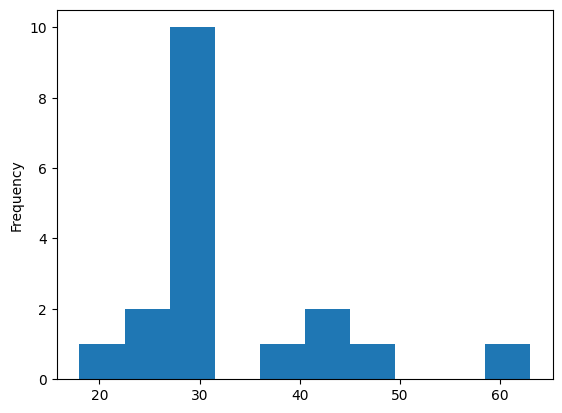

In [89]:
change_db_cleaned.loc[(change_db_cleaned['Title']=='Mrs')&(change_db_cleaned['Pclass']==3)&(change_db_cleaned['SibSp']==0),'Age'].plot.hist(bins=10)

### 👩‍🦰 Age Imputation for 'Mrs.' Title (3rd Class)

- **SibSp = 0, Parch = 2**  
  - 6 passengers total, 2 with missing age values  
  - Based on presence of young children (e.g., age 9) and comparison with similar parent-child pairs  
  - One adult outlier identified → excluded from group statistics  
  - Imputed both null values with **mean age = 26.7**

- **SibSp = 0, Parch = 0**  
  - 5 passengers total, 3 with missing age values  
  - Found an age outlier (63) that skewed the mean (32.8)  
  - Switched to **median age = 28** as a more robust central estimate  
  - Imputed all 3 nulls with **28**


In [90]:
change_db2.loc[(change_db2['Pclass']==3)&(change_db2['Title']=='Mrs')&(change_db2['SibSp']==1)&(change_db2['Parch']==0)].sort_values('Age')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
830,831,1,3,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0,1,0,2659,14.4542,NaN,C,Yasbeck,Mrs,Antoni,Selini Alexander
49,50,0,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18.0,1,0,349237,17.8000,NaN,S,Arnold-Franchi,Mrs,Josef,Josefine Franchi
142,143,1,3,"Hakkarainen, Mrs. Pekka Pietari (Elin Matilda ...",female,24.0,1,0,STON/O2. 3101279,15.8500,NaN,S,Hakkarainen,Mrs,Pekka Pietari,Elin Matilda Dolck
617,618,0,3,"Lobb, Mrs. William Arthur (Cordelia K Stanlick)",female,26.0,1,0,A/5. 3336,16.1000,NaN,S,Lobb,Mrs,William Arthur,Cordelia K Stanlick
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S,Vander Planke,Mrs,Julius,Emelia Maria Vandemoortele
559,560,1,3,"de Messemaeker, Mrs. Guillaume Joseph (Emma)",female,36.0,1,0,345572,17.4000,NaN,S,de Messemaeker,Mrs,Guillaume Joseph,Emma
40,41,0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40.0,1,0,7546,9.4750,NaN,S,Ahlin,Mrs,Johan,Johanna Persdotter Larsson
132,133,0,3,"Robins, Mrs. Alexander A (Grace Charity Laury)",female,47.0,1,0,A/5. 3337,14.5000,NaN,S,Robins,Mrs,Alexander A,Grace Charity Laury
186,187,1,3,"O'Brien, Mrs. Thomas (Johanna ""Hannah"" Godfrey)",female,NaN,1,0,370365,15.5000,NaN,Q,O'Brien,Mrs,Thomas,"Johanna ""Hannah"" Godfrey"
347,348,1,3,"Davison, Mrs. Thomas Henry (Mary E Finck)",female,NaN,1,0,386525,16.1000,NaN,S,Davison,Mrs,Thomas Henry,Mary E Finck


In [91]:
change_db2.loc[(change_db2['Pclass']==3)&(change_db2['Title']=='Mrs')&(change_db2['SibSp']==1)&(change_db2['Parch']==0)].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,12.000000,12.000000,12.0,8.000000,12.0,12.0,12.000000
mean,328.416667,0.500000,3.0,29.625000,1.0,0.0,15.478125
std,271.764088,0.522233,0.0,10.992692,0.0,0.0,2.252801
min,19.000000,0.000000,3.0,15.000000,1.0,0.0,9.475000
25%,112.250000,0.000000,3.0,22.500000,1.0,0.0,14.489575
50%,267.500000,0.500000,3.0,28.500000,1.0,0.0,15.975000
75%,564.750000,1.000000,3.0,37.000000,1.0,0.0,16.425000
max,831.000000,1.000000,3.0,47.000000,1.0,0.0,18.000000


<Axes: ylabel='Frequency'>

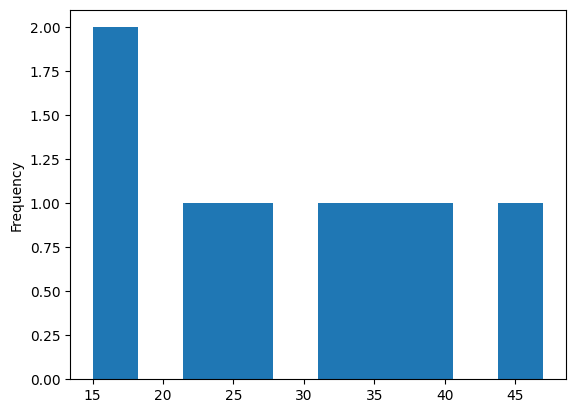

In [92]:
change_db2.loc[(change_db2['Pclass']==3)&(change_db2['Title']=='Mrs')&(change_db2['SibSp']==1)&(change_db2['Parch']==0),'Age'].plot.hist()

In [93]:
change_db2.loc[(change_db2['Pclass']==3)&(change_db2['Title']=='Mrs')&(change_db2['SibSp']==1)&(change_db2['Parch']==0)&(change_db2['Age'].isnull())]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
186,187,1,3,"O'Brien, Mrs. Thomas (Johanna ""Hannah"" Godfrey)",female,NaN,1,0,370365,15.5000,NaN,Q,O'Brien,Mrs,Thomas,"Johanna ""Hannah"" Godfrey"
347,348,1,3,"Davison, Mrs. Thomas Henry (Mary E Finck)",female,NaN,1,0,386525,16.1000,NaN,S,Davison,Mrs,Thomas Henry,Mary E Finck
431,432,1,3,"Thorneycroft, Mrs. Percival (Florence Kate White)",female,NaN,1,0,376564,16.1000,NaN,S,Thorneycroft,Mrs,Percival,Florence Kate White
578,579,0,3,"Caram, Mrs. Joseph (Maria Elias)",female,NaN,1,0,2689,14.4583,NaN,C,Caram,Mrs,Joseph,Maria Elias


In [94]:
mean=(change_db2.loc[(change_db2['Pclass']==3)&(change_db2['Title']=='Mrs')&(change_db2['SibSp']==1)&(change_db2['Parch']==0),'Age'].mean())
mean

np.float64(29.625)

In [95]:
median=(change_db2.loc[(change_db2['Pclass']==3)&(change_db2['Title']=='Mrs')&(change_db2['SibSp']==1)&(change_db2['Parch']==0),'Age'].median())
median

np.float64(28.5)

In [96]:
impute=round((mean+median)/2)
impute

29

In [97]:
change_db_cleaned.loc[(change_db_cleaned['Pclass']==3)&(change_db_cleaned['Title']=='Mrs')&(change_db_cleaned['SibSp']==1)&(change_db_cleaned['Parch']==0)&(change_db_cleaned['Age'].isnull()),'Age']=impute

In [98]:
change_db_cleaned.loc[(change_db_cleaned['Pclass']==3)&(change_db_cleaned['Title']=='Mrs')&(change_db_cleaned['SibSp']==1)&(change_db_cleaned['Parch']==0)].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,12.000000,12.000000,12.0,12.000000,12.0,12.0,12.000000
mean,328.416667,0.500000,3.0,29.416667,1.0,0.0,15.478125
std,271.764088,0.522233,0.0,8.774533,0.0,0.0,2.252801
min,19.000000,0.000000,3.0,15.000000,1.0,0.0,9.475000
25%,112.250000,0.000000,3.0,25.500000,1.0,0.0,14.489575
50%,267.500000,0.500000,3.0,29.000000,1.0,0.0,15.975000
75%,564.750000,1.000000,3.0,32.250000,1.0,0.0,16.425000
max,831.000000,1.000000,3.0,47.000000,1.0,0.0,18.000000


### 👩 Age Imputation for 'Mrs.' Title (1 SibSp, 0 Parch – 3rd Class)

- **12 passengers** in total, with **4 null age values**
- No consistent pattern found after analyzing relationships (husbands/siblings) and fare
- Imputed all 4 missing values with **29**, a rounded average of group mean (29.6) and median (28.5)


In [99]:
change_db2.loc[(change_db2['Title']=='Miss')&(change_db2['Age'].isnull()),'Pclass'].value_counts()

Pclass
3    33
2     2
1     1
Name: count, dtype: int64

In [100]:
change_db2.loc[(change_db2['Title']=='Miss')&(change_db2['Age'].isnull()),'SibSp'].value_counts()

SibSp
0    23
1     6
8     3
3     3
2     1
Name: count, dtype: int64

In [101]:
change_db2.loc[(change_db2['Title']=='Miss')&(change_db2['Pclass']==1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,Bonnell,Miss,Elizabeth,NaN
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,B28,NaN,Icard,Miss,Amelie,NaN
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S,Fortune,Miss,Mabel Helen,NaN
136,137,1,1,"Newsom, Miss. Helen Monypeny",female,19.0,0,2,11752,26.2833,D47,S,Newsom,Miss,Helen Monypeny,NaN
177,178,0,1,"Isham, Miss. Ann Elizabeth",female,50.0,0,0,PC 17595,28.7125,C49,C,Isham,Miss,Ann Elizabeth,NaN
195,196,1,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C,Lurette,Miss,Elise,NaN
215,216,1,1,"Newell, Miss. Madeleine",female,31.0,1,0,35273,113.2750,D36,C,Newell,Miss,Madeleine,NaN
218,219,1,1,"Bazzani, Miss. Albina",female,32.0,0,0,11813,76.2917,D15,C,Bazzani,Miss,Albina,NaN
257,258,1,1,"Cherry, Miss. Gladys",female,30.0,0,0,110152,86.5000,B77,S,Cherry,Miss,Gladys,NaN
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,Ward,Miss,Anna,NaN


In [102]:
change_db2.loc[(change_db2['Title']=='Miss')&(change_db2['Pclass']==1)&(change_db2['Age'].isnull())]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
306,307,1,1,"Fleming, Miss. Margaret",female,NaN,0,0,17421,110.8833,NaN,C,Fleming,Miss,Margaret,NaN


In [103]:
change_db2.loc[(change_db2['Title']=='Miss')&(change_db2['Pclass']==1)&(change_db2['SibSp']==0)&(change_db2['Parch']==0)].sort_values('Age')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
504,505,1,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.5000,B79,S,Maioni,Miss,Roberta,NaN
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Graham,Miss,Margaret Edith,NaN
627,628,1,1,"Longley, Miss. Gretchen Fiske",female,21.0,0,0,13502,77.9583,D9,S,Longley,Miss,Gretchen Fiske,NaN
708,709,1,1,"Cleaver, Miss. Alice",female,22.0,0,0,113781,151.5500,NaN,S,Cleaver,Miss,Alice,NaN
310,311,1,1,"Hays, Miss. Margaret Bechstein",female,24.0,0,0,11767,83.1583,C54,C,Hays,Miss,Margaret Bechstein,NaN
290,291,1,1,"Barber, Miss. Ellen ""Nellie""",female,26.0,0,0,19877,78.8500,NaN,S,Barber,Miss,"Ellen ""Nellie""",NaN
730,731,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,Allen,Miss,Elisabeth Walton,NaN
257,258,1,1,"Cherry, Miss. Gladys",female,30.0,0,0,110152,86.5000,B77,S,Cherry,Miss,Gladys,NaN
309,310,1,1,"Francatelli, Miss. Laura Mabel",female,30.0,0,0,PC 17485,56.9292,E36,C,Francatelli,Miss,Laura Mabel,NaN
520,521,1,1,"Perreault, Miss. Anne",female,30.0,0,0,12749,93.5000,B73,S,Perreault,Miss,Anne,NaN


In [104]:
change_db2.loc[(change_db2['Title']=='Miss')&(change_db2['Pclass']==1)&(change_db2['SibSp']==0)&(change_db2['Parch']==0)].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,25.000000,25.00,25.0,24.00000,25.0,25.0,25.000000
mean,416.320000,0.96,1.0,33.75000,0.0,0.0,123.570996
std,238.544671,0.20,0.0,10.89176,0.0,0.0,99.413838
min,12.000000,0.00,1.0,16.00000,0.0,0.0,26.550000
25%,259.000000,1.00,1.0,28.25000,0.0,0.0,77.958300
50%,326.000000,1.00,1.0,31.00000,0.0,0.0,93.500000
75%,610.000000,1.00,1.0,38.50000,0.0,0.0,146.520800
max,888.000000,1.00,1.0,58.00000,0.0,0.0,512.329200


<Axes: ylabel='Frequency'>

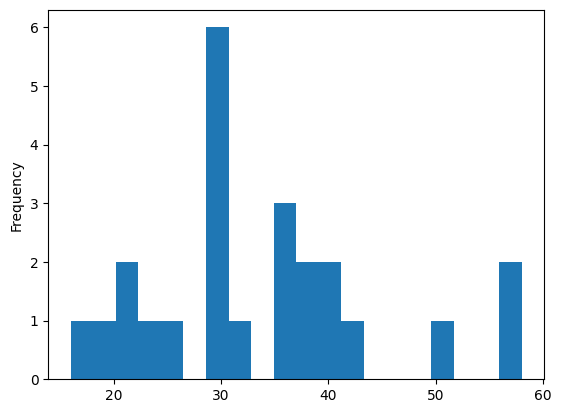

In [105]:
change_db2.loc[(change_db2['Title']=='Miss')&(change_db2['Pclass']==1)&(change_db2['SibSp']==0)&(change_db2['Parch']==0),'Age'].plot.hist(bins=20)

In [106]:
change_db_cleaned.loc[(change_db_cleaned['Title']=='Miss')&(change_db_cleaned['Pclass']==1)&(change_db_cleaned['SibSp']==0)&(change_db_cleaned['Parch']==0),'Age'].median()

np.float64(31.0)

In [107]:
change_db_cleaned.loc[(change_db_cleaned['Title']=='Miss')&(change_db_cleaned['Pclass']==1)&(change_db_cleaned['SibSp']==0)&(change_db_cleaned['Parch']==0)&(change_db_cleaned['Age'].isnull()),'Age']=change_db_cleaned.loc[(change_db_cleaned['Title']=='Miss')&(change_db_cleaned['Pclass']==1)&(change_db_cleaned['SibSp']==0)&(change_db_cleaned['Parch']==0),'Age'].median()

In [108]:
change_db_cleaned.loc[(change_db_cleaned['Title']=='Miss')&(change_db_cleaned['Pclass']==1)&(change_db_cleaned['SibSp']==0)&(change_db_cleaned['Parch']==0)].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,25.000000,25.00,25.0,25.00000,25.0,25.0,25.000000
mean,416.320000,0.96,1.0,33.64000,0.0,0.0,123.570996
std,238.544671,0.20,0.0,10.67661,0.0,0.0,99.413838
min,12.000000,0.00,1.0,16.00000,0.0,0.0,26.550000
25%,259.000000,1.00,1.0,29.00000,0.0,0.0,77.958300
50%,326.000000,1.00,1.0,31.00000,0.0,0.0,93.500000
75%,610.000000,1.00,1.0,38.00000,0.0,0.0,146.520800
max,888.000000,1.00,1.0,58.00000,0.0,0.0,512.329200


`Miss` Title of `1st Class` (1 null age value): Imputed the median of the group (0-`SibSp` and 0-`Parch`)

In [109]:
change_db2.loc[(change_db2['Title']=='Miss')&(change_db2['Pclass']==2)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.0,1,2,SC/Paris 2123,41.5792,NaN,C,Laroche,Miss,Simonne Marie Anne Andree,NaN
56,57,1,2,"Rugg, Miss. Emily",female,21.0,0,0,C.A. 31026,10.5000,NaN,S,Rugg,Miss,Emily,NaN
58,59,1,2,"West, Miss. Constance Mirium",female,5.0,1,2,C.A. 34651,27.7500,NaN,S,West,Miss,Constance Mirium,NaN
84,85,1,2,"Ilett, Miss. Bertha",female,17.0,0,0,SO/C 14885,10.5000,NaN,S,Ilett,Miss,Bertha,NaN
123,124,1,2,"Webber, Miss. Susan",female,32.5,0,0,27267,13.0000,E101,S,Webber,Miss,Susan,NaN
199,200,0,2,"Yrois, Miss. Henriette (""Mrs Harbeck"")",female,24.0,0,0,248747,13.0000,NaN,S,Yrois,Miss,Henriette,"""Mrs Harbeck"""
211,212,1,2,"Cameron, Miss. Clear Annie",female,35.0,0,0,F.C.C. 13528,21.0000,NaN,S,Cameron,Miss,Clear Annie,NaN
237,238,1,2,"Collyer, Miss. Marjorie ""Lottie""",female,8.0,0,2,C.A. 31921,26.2500,NaN,S,Collyer,Miss,"Marjorie ""Lottie""",NaN
303,304,1,2,"Keane, Miss. Nora A",female,NaN,0,0,226593,12.3500,E101,Q,Keane,Miss,Nora A,NaN
322,323,1,2,"Slayter, Miss. Hilda Mary",female,30.0,0,0,234818,12.3500,NaN,Q,Slayter,Miss,Hilda Mary,NaN


In [110]:
change_db2.loc[(change_db2['Title']=='Miss')&(change_db2['Pclass']==2)&(change_db2['Age'].isnull())]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
303,304,1,2,"Keane, Miss. Nora A",female,NaN,0,0,226593,12.35,E101,Q,Keane,Miss,Nora A,NaN
596,597,1,2,"Leitch, Miss. Jessie Wills",female,NaN,0,0,248727,33.00,NaN,S,Leitch,Miss,Jessie Wills,NaN


In [111]:
change_db2.loc[(change_db2['Title']=='Miss')&(change_db2['Pclass']==2)&(change_db2['SibSp']==0)&(change_db2['Parch']==0)].sort_values('Age')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
84,85,1,2,"Ilett, Miss. Bertha",female,17.0,0,0,SO/C 14885,10.50,NaN,S,Ilett,Miss,Bertha,NaN
389,390,1,2,"Lehmann, Miss. Bertha",female,17.0,0,0,SC 1748,12.00,NaN,C,Lehmann,Miss,Bertha,NaN
427,428,1,2,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",female,19.0,0,0,250655,26.00,NaN,S,Phillips,Miss,Kate Florence,"""Mrs Kate Louise Phillips Marshall"""
56,57,1,2,"Rugg, Miss. Emily",female,21.0,0,0,C.A. 31026,10.50,NaN,S,Rugg,Miss,Emily,NaN
199,200,0,2,"Yrois, Miss. Henriette (""Mrs Harbeck"")",female,24.0,0,0,248747,13.00,NaN,S,Yrois,Miss,Henriette,"""Mrs Harbeck"""
345,346,1,2,"Brown, Miss. Amelia ""Mildred""",female,24.0,0,0,248733,13.00,F33,S,Brown,Miss,"Amelia ""Mildred""",NaN
717,718,1,2,"Troutt, Miss. Edwina Celia ""Winnie""",female,27.0,0,0,34218,10.50,E101,S,Troutt,Miss,"Edwina Celia ""Winnie""",NaN
635,636,1,2,"Davis, Miss. Mary",female,28.0,0,0,237668,13.00,NaN,S,Davis,Miss,Mary,NaN
747,748,1,2,"Sinkkonen, Miss. Anna",female,30.0,0,0,250648,13.00,NaN,S,Sinkkonen,Miss,Anna,NaN
322,323,1,2,"Slayter, Miss. Hilda Mary",female,30.0,0,0,234818,12.35,NaN,Q,Slayter,Miss,Hilda Mary,NaN


<Axes: xlabel='Age', ylabel='Fare'>

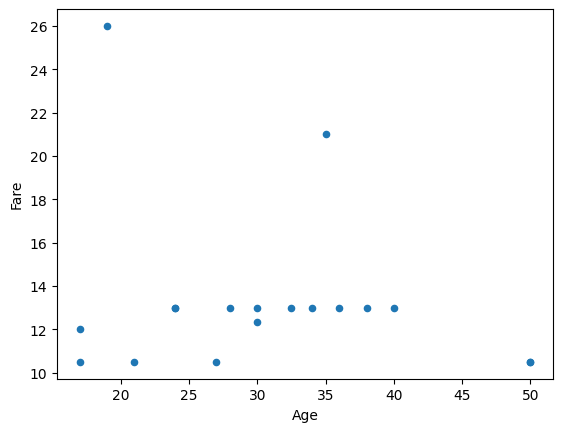

In [112]:
change_db2.loc[(change_db2['Title']=='Miss')&(change_db2['Pclass']==2)&(change_db2['SibSp']==0)&(change_db2['Parch']==0)].plot.scatter(x='Age',y='Fare')

<Axes: ylabel='Frequency'>

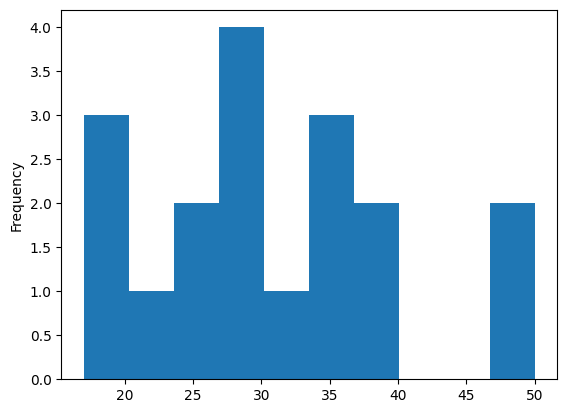

In [113]:
change_db2.loc[(change_db2['Title']=='Miss')&(change_db2['Pclass']==2)&(change_db2['SibSp']==0)&(change_db2['Parch']==0),'Age'].plot.hist()

In [114]:
change_db2.loc[(change_db2['Title']=='Miss')&(change_db2['Pclass']==2)&(change_db2['SibSp']==0)&(change_db2['Parch']==0)].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,20.000000,20.000000,20.0,18.000000,20.0,20.0,20.000000
mean,391.200000,0.900000,2.0,30.694444,0.0,0.0,14.310000
std,199.760277,0.307794,0.0,9.892271,0.0,0.0,5.766386
min,57.000000,0.000000,2.0,17.000000,0.0,0.0,10.500000
25%,281.000000,1.000000,2.0,24.000000,0.0,0.0,11.625000
50%,373.000000,1.000000,2.0,30.000000,0.0,0.0,13.000000
75%,539.500000,1.000000,2.0,35.750000,0.0,0.0,13.000000
max,748.000000,1.000000,2.0,50.000000,0.0,0.0,33.000000


In [115]:
change_db_cleaned.loc[(change_db_cleaned['Title']=='Miss')&(change_db_cleaned['Pclass']==2)&(change_db_cleaned['SibSp']==0)&(change_db_cleaned['Parch']==0),'Age'].median()

np.float64(30.0)

In [116]:
change_db_cleaned.loc[(change_db_cleaned['Title']=='Miss')&(change_db_cleaned['Pclass']==2)&(change_db_cleaned['Age'].isnull())&(change_db_cleaned['SibSp']==0)&(change_db_cleaned['Parch']==0),'Age']=change_db_cleaned.loc[(change_db_cleaned['Title']=='Miss')&(change_db_cleaned['Pclass']==2)&(change_db_cleaned['SibSp']==0)&(change_db_cleaned['Parch']==0),'Age'].median()

In [117]:
change_db_cleaned.loc[(change_db_cleaned['Title']=='Miss')&(change_db_cleaned['Pclass']==2)&(change_db_cleaned['SibSp']==0)&(change_db_cleaned['Parch']==0)].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,20.000000,20.000000,20.0,20.000000,20.0,20.0,20.000000
mean,391.200000,0.900000,2.0,30.625000,0.0,0.0,14.310000
std,199.760277,0.307794,0.0,9.359593,0.0,0.0,5.766386
min,57.000000,0.000000,2.0,17.000000,0.0,0.0,10.500000
25%,281.000000,1.000000,2.0,24.000000,0.0,0.0,11.625000
50%,373.000000,1.000000,2.0,30.000000,0.0,0.0,13.000000
75%,539.500000,1.000000,2.0,35.250000,0.0,0.0,13.000000
max,748.000000,1.000000,2.0,50.000000,0.0,0.0,33.000000


`Miss` Title of `2st Class` (2 null age value): Imputed the median of the group (0-`SibSp` and 0-`Parch`),i.e., 30.

In [118]:
change_db2.loc[(change_db2['Title']=='Miss')&(change_db2['Pclass']==3)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,Laina,NaN
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,Sandstrom,Miss,Marguerite Rut,NaN
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S,Vestrom,Miss,Hulda Amanda Adolfina,NaN
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q,McGowan,Miss,"Anna ""Annie""",NaN
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NaN,S,Palsson,Miss,Torborg Danira,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,853,0,3,"Boulos, Miss. Nourelain",female,9.0,1,1,2678,15.2458,NaN,C,Boulos,Miss,Nourelain,NaN
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,Sage,Miss,"Dorothy Edith ""Dolly""",NaN
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C,Najib,Miss,"Adele Kiamie ""Jane""",NaN
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S,Dahlberg,Miss,Gerda Ulrika,NaN


In [119]:
change_db2.loc[(change_db2['Title']=='Miss')&(change_db2['Pclass']==3)&(change_db2['Age'].isnull())]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,O'Dwyer,Miss,"Ellen ""Nellie""",NaN
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q,Glynn,Miss,Mary Agatha,NaN
47,48,1,3,"O'Driscoll, Miss. Bridget",female,NaN,0,0,14311,7.7500,NaN,Q,O'Driscoll,Miss,Bridget,NaN
82,83,1,3,"McDermott, Miss. Brigdet Delia",female,NaN,0,0,330932,7.7875,NaN,Q,McDermott,Miss,Brigdet Delia,NaN
109,110,1,3,"Moran, Miss. Bertha",female,NaN,1,0,371110,24.1500,NaN,Q,Moran,Miss,Bertha,NaN
128,129,1,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,F E69,C,Peter,Miss,Anna,NaN
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.5500,NaN,S,Sage,Miss,Constance Gladys,NaN
198,199,1,3,"Madigan, Miss. Margaret ""Maggie""",female,NaN,0,0,370370,7.7500,NaN,Q,Madigan,Miss,"Margaret ""Maggie""",NaN
229,230,0,3,"Lefebre, Miss. Mathilde",female,NaN,3,1,4133,25.4667,NaN,S,Lefebre,Miss,Mathilde,NaN
235,236,0,3,"Harknett, Miss. Alice Phoebe",female,NaN,0,0,W./C. 6609,7.5500,NaN,S,Harknett,Miss,Alice Phoebe,NaN


In [120]:
change_db2.loc[(change_db2['Title']=='Miss')&(change_db2['Pclass']==3)&(change_db2['Age'].isnull()),'SibSp'].value_counts()

SibSp
0    20
1     6
8     3
3     3
2     1
Name: count, dtype: int64

In [121]:
change_db2.loc[(change_db2['Title']=='Miss')&(change_db2['Pclass']==3)&(change_db2['Age'].isnull())&(change_db2['SibSp']==2)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
330,331,1,3,"McCoy, Miss. Agnes",female,NaN,2,0,367226,23.25,NaN,Q,McCoy,Miss,Agnes,NaN


In [122]:
change_db2.loc[change_db2['Ticket']=='367226']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
301,302,1,3,"McCoy, Mr. Bernard",male,NaN,2,0,367226,23.25,NaN,Q,McCoy,Mr,Bernard,NaN
330,331,1,3,"McCoy, Miss. Agnes",female,NaN,2,0,367226,23.25,NaN,Q,McCoy,Miss,Agnes,NaN


Since the only `Miss` passenger in `3rd class` with **2 SibSp** had no known age and her sibling also had null age, the value was imputed using the mean/median age of all cleaned Miss passengers in 3rd class.

In [123]:
change_db2.loc[(change_db2['Title']=='Miss')&(change_db2['Pclass']==3)&(change_db2['SibSp']==3)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NaN,S,Palsson,Miss,Torborg Danira,NaN
229,230,0,3,"Lefebre, Miss. Mathilde",female,NaN,3,1,4133,25.4667,NaN,S,Lefebre,Miss,Mathilde,NaN
374,375,0,3,"Palsson, Miss. Stina Viola",female,3.0,3,1,349909,21.0750,NaN,S,Palsson,Miss,Stina Viola,NaN
409,410,0,3,"Lefebre, Miss. Ida",female,NaN,3,1,4133,25.4667,NaN,S,Lefebre,Miss,Ida,NaN
485,486,0,3,"Lefebre, Miss. Jeannie",female,NaN,3,1,4133,25.4667,NaN,S,Lefebre,Miss,Jeannie,NaN
634,635,0,3,"Skoog, Miss. Mabel",female,9.0,3,2,347088,27.9000,NaN,S,Skoog,Miss,Mabel,NaN
642,643,0,3,"Skoog, Miss. Margit Elizabeth",female,2.0,3,2,347088,27.9000,NaN,S,Skoog,Miss,Margit Elizabeth,NaN


In [124]:
change_db2.loc[(change_db2['Title']=='Miss')&(change_db2['Pclass']==3)&(change_db2['SibSp']==3)].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,7.000000,7.0,7.0,4.000000,7.0,7.000000,7.000000
mean,400.571429,0.0,3.0,5.500000,3.0,1.285714,24.907157
std,220.574143,0.0,0.0,3.511885,0.0,0.487950,2.835029
min,25.000000,0.0,3.0,2.000000,3.0,1.000000,21.075000
25%,302.500000,0.0,3.0,2.750000,3.0,1.000000,23.270850
50%,410.000000,0.0,3.0,5.500000,3.0,1.000000,25.466700
75%,560.500000,0.0,3.0,8.250000,3.0,1.500000,26.683350
max,643.000000,0.0,3.0,9.000000,3.0,2.000000,27.900000


In [125]:
change_db_cleaned.loc[change_db_cleaned['LastName']=='Lefebre']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
176,177,0,3,"Lefebre, Master. Henry Forbes",male,5.0,3,1,4133,25.4667,NaN,S,Lefebre,Master,Henry Forbes,NaN
229,230,0,3,"Lefebre, Miss. Mathilde",female,NaN,3,1,4133,25.4667,NaN,S,Lefebre,Miss,Mathilde,NaN
409,410,0,3,"Lefebre, Miss. Ida",female,NaN,3,1,4133,25.4667,NaN,S,Lefebre,Miss,Ida,NaN
485,486,0,3,"Lefebre, Miss. Jeannie",female,NaN,3,1,4133,25.4667,NaN,S,Lefebre,Miss,Jeannie,NaN


In [126]:
change_db_cleaned.loc[change_db_cleaned['PassengerId']==230,'Age']=4

In [127]:
change_db_cleaned.loc[change_db_cleaned['PassengerId']==410,'Age']=7

In [128]:
change_db_cleaned.loc[change_db_cleaned['PassengerId']==486,'Age']=6

In [129]:
change_db_cleaned.loc[(change_db_cleaned['Title']=='Miss')&(change_db_cleaned['Pclass']==3)&(change_db_cleaned['SibSp']==3)].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,7.000000,7.0,7.0,7.000000,7.0,7.000000,7.000000
mean,400.571429,0.0,3.0,5.571429,3.0,1.285714,24.907157
std,220.574143,0.0,0.0,2.636737,0.0,0.487950,2.835029
min,25.000000,0.0,3.0,2.000000,3.0,1.000000,21.075000
25%,302.500000,0.0,3.0,3.500000,3.0,1.000000,23.270850
50%,410.000000,0.0,3.0,6.000000,3.0,1.000000,25.466700
75%,560.500000,0.0,3.0,7.500000,3.0,1.500000,26.683350
max,643.000000,0.0,3.0,9.000000,3.0,2.000000,27.900000


🔧 Age Imputation | Miss (3rd Class, 3 SibSp): Imputed child ages (4, 6, 7) to preserve group profile

In [130]:
change_db2.loc[(change_db2['Title']=='Miss')&(change_db2['Pclass']==3)&(change_db2['SibSp']==8)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S,Sage,Miss,Constance Gladys,NaN
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S,Sage,Miss,Stella Anna,NaN
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S,Sage,Miss,"Dorothy Edith ""Dolly""",NaN


In [131]:
change_db2.loc[change_db2['LastName']=='Sage']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S,Sage,Master,Thomas Henry,NaN
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S,Sage,Miss,Constance Gladys,NaN
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S,Sage,Mr,Frederick,NaN
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S,Sage,Mr,George John Jr,NaN
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S,Sage,Miss,Stella Anna,NaN
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S,Sage,Mr,Douglas Bullen,NaN
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S,Sage,Miss,"Dorothy Edith ""Dolly""",NaN


In [132]:
change_db2.loc[change_db2['Ticket']=='CA. 2343']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S,Sage,Master,Thomas Henry,NaN
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S,Sage,Miss,Constance Gladys,NaN
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S,Sage,Mr,Frederick,NaN
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S,Sage,Mr,George John Jr,NaN
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S,Sage,Miss,Stella Anna,NaN
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S,Sage,Mr,Douglas Bullen,NaN
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S,Sage,Miss,"Dorothy Edith ""Dolly""",NaN


In [133]:
change_db_cleaned.loc[change_db_cleaned['LastName']=='Sage']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
159,160,0,3,"Sage, Master. Thomas Henry",male,5.0,8,2,CA. 2343,69.55,NaN,S,Sage,Master,Thomas Henry,NaN
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S,Sage,Miss,Constance Gladys,NaN
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S,Sage,Mr,Frederick,NaN
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S,Sage,Mr,George John Jr,NaN
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S,Sage,Miss,Stella Anna,NaN
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S,Sage,Mr,Douglas Bullen,NaN
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S,Sage,Miss,"Dorothy Edith ""Dolly""",NaN


In [134]:
change_db2.loc[(change_db2['SibSp']>=3)].sort_values(['SibSp','LastName','Age'],ascending=False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,NaN,S,Sage,Master,Thomas Henry,NaN
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.5500,NaN,S,Sage,Miss,Constance Gladys,NaN
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.5500,NaN,S,Sage,Mr,Frederick,NaN
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.5500,NaN,S,Sage,Mr,George John Jr,NaN
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.5500,NaN,S,Sage,Miss,Stella Anna,NaN
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.5500,NaN,S,Sage,Mr,Douglas Bullen,NaN
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,Sage,Miss,"Dorothy Edith ""Dolly""",NaN
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9000,NaN,S,Goodwin,Miss,Lillian Amy,NaN
683,684,0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.9000,NaN,S,Goodwin,Mr,Charles Edward,NaN
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,NaN,S,Goodwin,Master,William Frederick,NaN


🕳️ Skipped imputation for 3 'Miss' passengers (3rd class, 8 SibSp) due to lack of reliable age patterns

In [135]:
change_db2.loc[(change_db2['Title']=='Miss')&(change_db2['Pclass']==3)&(change_db2['SibSp']==1)].sort_values('Age')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
172,173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.0,1,1,347742,11.1333,NaN,S,Johnson,Miss,Eleanor Ileen,NaN
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,Sandstrom,Miss,Marguerite Rut,NaN
852,853,0,3,"Boulos, Miss. Nourelain",female,9.0,1,1,2678,15.2458,NaN,C,Boulos,Miss,Nourelain,NaN
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C,Nicola-Yarred,Miss,Jamila,NaN
111,112,0,3,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,Zabour,Miss,Hileni,NaN
192,193,1,3,"Andersen-Jensen, Miss. Carla Christine Nielsine",female,19.0,1,0,350046,7.8542,NaN,S,Andersen-Jensen,Miss,Carla Christine Nielsine,NaN
113,114,0,3,"Jussila, Miss. Katriina",female,20.0,1,0,4136,9.8250,NaN,S,Jussila,Miss,Katriina,NaN
402,403,0,3,"Jussila, Miss. Mari Aina",female,21.0,1,0,4137,9.8250,NaN,S,Jussila,Miss,Mari Aina,NaN
729,730,0,3,"Ilmakangas, Miss. Pieta Sofia",female,25.0,1,0,STON/O2. 3101271,7.9250,NaN,S,Ilmakangas,Miss,Pieta Sofia,NaN
109,110,1,3,"Moran, Miss. Bertha",female,NaN,1,0,371110,24.1500,NaN,Q,Moran,Miss,Bertha,NaN


In [136]:
change_db2.loc[(change_db2['Title']=='Miss')&(change_db2['Pclass']==3)&(change_db2['SibSp']==1)&(change_db2['Parch']==0)].sort_values('Age')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C,Nicola-Yarred,Miss,Jamila,NaN
111,112,0,3,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,Zabour,Miss,Hileni,NaN
192,193,1,3,"Andersen-Jensen, Miss. Carla Christine Nielsine",female,19.0,1,0,350046,7.8542,NaN,S,Andersen-Jensen,Miss,Carla Christine Nielsine,NaN
113,114,0,3,"Jussila, Miss. Katriina",female,20.0,1,0,4136,9.8250,NaN,S,Jussila,Miss,Katriina,NaN
402,403,0,3,"Jussila, Miss. Mari Aina",female,21.0,1,0,4137,9.8250,NaN,S,Jussila,Miss,Mari Aina,NaN
729,730,0,3,"Ilmakangas, Miss. Pieta Sofia",female,25.0,1,0,STON/O2. 3101271,7.9250,NaN,S,Ilmakangas,Miss,Pieta Sofia,NaN
109,110,1,3,"Moran, Miss. Bertha",female,NaN,1,0,371110,24.1500,NaN,Q,Moran,Miss,Bertha,NaN
240,241,0,3,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,Zabour,Miss,Thamine,NaN
241,242,1,3,"Murphy, Miss. Katherine ""Kate""",female,NaN,1,0,367230,15.5000,NaN,Q,Murphy,Miss,"Katherine ""Kate""",NaN
612,613,1,3,"Murphy, Miss. Margaret Jane",female,NaN,1,0,367230,15.5000,NaN,Q,Murphy,Miss,Margaret Jane,NaN


In [137]:
change_db2.loc[(change_db2['Title']=='Miss')&(change_db2['Pclass']==3)&(change_db2['SibSp']==1)&(change_db2['Parch']==0)&(change_db2['Age'].isnull())]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
109,110,1,3,"Moran, Miss. Bertha",female,NaN,1,0,371110,24.1500,NaN,Q,Moran,Miss,Bertha,NaN
240,241,0,3,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,Zabour,Miss,Thamine,NaN
241,242,1,3,"Murphy, Miss. Katherine ""Kate""",female,NaN,1,0,367230,15.5000,NaN,Q,Murphy,Miss,"Katherine ""Kate""",NaN
612,613,1,3,"Murphy, Miss. Margaret Jane",female,NaN,1,0,367230,15.5000,NaN,Q,Murphy,Miss,Margaret Jane,NaN


In [138]:
change_db2.loc[(change_db2['Title']=='Miss')&(change_db2['Pclass']==3)&(change_db2['SibSp']==1)&(change_db2['Parch']==0)].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,10.000000,10.000000,10.0,6.000000,10.0,10.0,10.000000
mean,279.800000,0.500000,3.0,18.916667,1.0,0.0,13.072930
std,231.260219,0.527046,0.0,4.152309,0.0,0.0,4.904493
min,40.000000,0.000000,3.0,14.000000,1.0,0.0,7.854200
25%,112.500000,0.000000,3.0,15.625000,1.0,0.0,9.825000
50%,217.000000,0.500000,3.0,19.500000,1.0,0.0,12.847950
75%,362.750000,1.000000,3.0,20.750000,1.0,0.0,15.238550
max,730.000000,1.000000,3.0,25.000000,1.0,0.0,24.150000


🔍 Deferred Imputation for 'Miss' (3rd Class, 1 SibSp, 0 Parch) – No Strong Pattern Found

In [139]:
change_db2.loc[(change_db2['Title']=='Miss')&(change_db2['Pclass']==3)&(change_db2['SibSp']==1)&(change_db2['Parch']==2)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,Johnston,Miss,"Catherine Helen ""Carrie""",NaN


👧 Left age null for 3rd-class 'Miss' (1 SibSp, 2 Parch) due to insufficient family reference

In [140]:
change_db2.loc[(change_db2['Title']=='Miss')&(change_db2['Pclass']==3)&(change_db2['SibSp']==0)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,Laina,NaN
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S,Vestrom,Miss,Hulda Amanda Adolfina,NaN
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q,McGowan,Miss,"Anna ""Annie""",NaN
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,O'Dwyer,Miss,"Ellen ""Nellie""",NaN
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q,Glynn,Miss,Mary Agatha,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786,787,1,3,"Sjoblom, Miss. Anna Sofia",female,18.0,0,0,3101265,7.4958,NaN,S,Sjoblom,Miss,Anna Sofia,NaN
807,808,0,3,"Pettersson, Miss. Ellen Natalia",female,18.0,0,0,347087,7.7750,NaN,S,Pettersson,Miss,Ellen Natalia,NaN
816,817,0,3,"Heininen, Miss. Wendla Maria",female,23.0,0,0,STON/O2. 3101290,7.9250,NaN,S,Heininen,Miss,Wendla Maria,NaN
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C,Najib,Miss,"Adele Kiamie ""Jane""",NaN


In [141]:
change_db2.loc[(change_db2['Title']=='Miss')&(change_db2['Pclass']==3)&(change_db2['SibSp']==0)&(change_db2['Parch']==2)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
184,185,1,3,"Kink-Heilmann, Miss. Luise Gretchen",female,4.0,0,2,315153,22.0250,NaN,S,Kink-Heilmann,Miss,Luise Gretchen,NaN
381,382,1,3,"Nakid, Miss. Maria (""Mary"")",female,1.0,0,2,2653,15.7417,NaN,C,Nakid,Miss,Maria,"""Mary"""
419,420,0,3,"Van Impe, Miss. Catharina",female,10.0,0,2,345773,24.1500,NaN,S,Van Impe,Miss,Catharina,NaN
593,594,0,3,"Bourke, Miss. Mary",female,NaN,0,2,364848,7.7500,NaN,Q,Bourke,Miss,Mary,NaN


In [142]:
change_db2.loc[(change_db2['Title']=='Miss')&(change_db2['Pclass']==3)&(change_db2['SibSp']==0)&(change_db2['Parch']==2)].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,4.000000,4.00000,4.0,3.000000,4.0,4.0,4.000000
mean,395.250000,0.50000,3.0,5.000000,0.0,2.0,17.416675
std,167.824065,0.57735,0.0,4.582576,0.0,0.0,7.367145
min,185.000000,0.00000,3.0,1.000000,0.0,2.0,7.750000
25%,332.750000,0.00000,3.0,2.500000,0.0,2.0,13.743775
50%,401.000000,0.50000,3.0,4.000000,0.0,2.0,18.883350
75%,463.500000,1.00000,3.0,7.000000,0.0,2.0,22.556250
max,594.000000,1.00000,3.0,10.000000,0.0,2.0,24.150000


In [143]:
change_db2.loc[(change_db2['Title']=='Miss')&(change_db2['Pclass']==3)&(change_db2['SibSp']==0)&(change_db2['Parch']==2),'Age'].median()

np.float64(4.0)

In [144]:
change_db2.loc[(change_db2['Title']=='Miss')&(change_db2['Pclass']==3)&(change_db2['SibSp']==0)&(change_db2['Parch']==2),'Ticket'].unique()

array(['315153', '2653', '345773', '364848'], dtype=object)

In [145]:
change_db2.loc[change_db2['LastName'].isin(change_db2.loc[(change_db2['Title']=='Miss')&(change_db2['Pclass']==3)&(change_db2['SibSp']==0)&(change_db2['Parch']==2),'LastName'].unique())].sort_values('LastName')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
188,189,0,3,"Bourke, Mr. John",male,40.0,1,1,364849,15.5000,NaN,Q,Bourke,Mr,John,NaN
593,594,0,3,"Bourke, Miss. Mary",female,NaN,0,2,364848,7.7500,NaN,Q,Bourke,Miss,Mary,NaN
657,658,0,3,"Bourke, Mrs. John (Catherine)",female,32.0,1,1,364849,15.5000,NaN,Q,Bourke,Mrs,John,Catherine
184,185,1,3,"Kink-Heilmann, Miss. Luise Gretchen",female,4.0,0,2,315153,22.0250,NaN,S,Kink-Heilmann,Miss,Luise Gretchen,NaN
381,382,1,3,"Nakid, Miss. Maria (""Mary"")",female,1.0,0,2,2653,15.7417,NaN,C,Nakid,Miss,Maria,"""Mary"""
622,623,1,3,"Nakid, Mr. Sahid",male,20.0,1,1,2653,15.7417,NaN,C,Nakid,Mr,Sahid,NaN
419,420,0,3,"Van Impe, Miss. Catharina",female,10.0,0,2,345773,24.1500,NaN,S,Van Impe,Miss,Catharina,NaN
595,596,0,3,"Van Impe, Mr. Jean Baptiste",male,36.0,1,1,345773,24.1500,NaN,S,Van Impe,Mr,Jean Baptiste,NaN
799,800,0,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,Van Impe,Mrs,Jean Baptiste,Rosalie Paula Govaert


In [146]:
change_db_cleaned.loc[(change_db_cleaned['Title']=='Miss')&(change_db_cleaned['Pclass']==3)&(change_db_cleaned['SibSp']==0)&(change_db_cleaned['Parch']==2)&(change_db_cleaned['Age'].isnull()),'Age']=change_db_cleaned.loc[(change_db_cleaned['Title']=='Miss')&(change_db_cleaned['Pclass']==3)&(change_db_cleaned['SibSp']==0)&(change_db_cleaned['Parch']==2),'Age'].median()

In [147]:
change_db2.loc[(change_db2['Title']=='Miss')&(change_db2['Pclass']==3)&(change_db2['SibSp']==0)&(change_db2['Parch']==2)].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,4.000000,4.00000,4.0,3.000000,4.0,4.0,4.000000
mean,395.250000,0.50000,3.0,5.000000,0.0,2.0,17.416675
std,167.824065,0.57735,0.0,4.582576,0.0,0.0,7.367145
min,185.000000,0.00000,3.0,1.000000,0.0,2.0,7.750000
25%,332.750000,0.00000,3.0,2.500000,0.0,2.0,13.743775
50%,401.000000,0.50000,3.0,4.000000,0.0,2.0,18.883350
75%,463.500000,1.00000,3.0,7.000000,0.0,2.0,22.556250
max,594.000000,1.00000,3.0,10.000000,0.0,2.0,24.150000


🧒 Imputed age with median (4) for 'Miss' (3rd class, 0 SibSp, 2 Parch)


In [148]:
change_db2.loc[(change_db2['Title']=='Miss')&(change_db2['Pclass']==3)&(change_db2['SibSp']==0)&(change_db2['Parch']==0)].sort_values('Age')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
777,778,1,3,"Emanuel, Miss. Virginia Ethel",female,5.0,0,0,364516,12.4750,NaN,S,Emanuel,Miss,Virginia Ethel,NaN
780,781,1,3,"Ayoub, Miss. Banoura",female,13.0,0,0,2687,7.2292,NaN,C,Ayoub,Miss,Banoura,NaN
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S,Vestrom,Miss,Hulda Amanda Adolfina,NaN
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q,McGowan,Miss,"Anna ""Annie""",NaN
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C,Najib,Miss,"Adele Kiamie ""Jane""",NaN
208,209,1,3,"Carr, Miss. Helen ""Ellen""",female,16.0,0,0,367231,7.7500,NaN,Q,Carr,Miss,"Helen ""Ellen""",NaN
156,157,1,3,"Gilnagh, Miss. Katherine ""Katie""",female,16.0,0,0,35851,7.7333,NaN,Q,Gilnagh,Miss,"Katherine ""Katie""",NaN
114,115,0,3,"Attalah, Miss. Malake",female,17.0,0,0,2627,14.4583,NaN,C,Attalah,Miss,Malake,NaN
677,678,1,3,"Turja, Miss. Anna Sofia",female,18.0,0,0,4138,9.8417,NaN,S,Turja,Miss,Anna Sofia,NaN
786,787,1,3,"Sjoblom, Miss. Anna Sofia",female,18.0,0,0,3101265,7.4958,NaN,S,Sjoblom,Miss,Anna Sofia,NaN


In [149]:
change_db2.loc[(change_db2['Title']=='Miss')&(change_db2['Pclass']==3)&(change_db2['SibSp']==0)&(change_db2['Parch']==0)].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,55.000000,55.000000,55.0,36.000000,55.0,55.0,55.000000
mean,396.890909,0.600000,3.0,22.263889,0.0,0.0,8.241975
std,267.521385,0.494413,0.0,7.267822,0.0,0.0,1.370905
min,3.000000,0.000000,3.0,5.000000,0.0,0.0,6.750000
25%,178.000000,0.000000,3.0,18.000000,0.0,0.0,7.750000
50%,360.000000,1.000000,3.0,22.000000,0.0,0.0,7.775000
75%,652.000000,1.000000,3.0,26.000000,0.0,0.0,7.925000
max,883.000000,1.000000,3.0,45.000000,0.0,0.0,14.458300


In [150]:
change_db2.loc[(change_db2['Title']=='Miss')&(change_db2['Pclass']==3)&(change_db2['SibSp']==0)&(change_db2['Parch']==0)&(change_db2['Age'].isnull())]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,O'Dwyer,Miss,"Ellen ""Nellie""",NaN
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q,Glynn,Miss,Mary Agatha,NaN
47,48,1,3,"O'Driscoll, Miss. Bridget",female,NaN,0,0,14311,7.7500,NaN,Q,O'Driscoll,Miss,Bridget,NaN
82,83,1,3,"McDermott, Miss. Brigdet Delia",female,NaN,0,0,330932,7.7875,NaN,Q,McDermott,Miss,Brigdet Delia,NaN
198,199,1,3,"Madigan, Miss. Margaret ""Maggie""",female,NaN,0,0,370370,7.7500,NaN,Q,Madigan,Miss,"Margaret ""Maggie""",NaN
235,236,0,3,"Harknett, Miss. Alice Phoebe",female,NaN,0,0,W./C. 6609,7.5500,NaN,S,Harknett,Miss,Alice Phoebe,NaN
264,265,0,3,"Henry, Miss. Delia",female,NaN,0,0,382649,7.7500,NaN,Q,Henry,Miss,Delia,NaN
274,275,1,3,"Healy, Miss. Hanora ""Nora""",female,NaN,0,0,370375,7.7500,NaN,Q,Healy,Miss,"Hanora ""Nora""",NaN
300,301,1,3,"Kelly, Miss. Anna Katherine ""Annie Kate""",female,NaN,0,0,9234,7.7500,NaN,Q,Kelly,Miss,"Anna Katherine ""Annie Kate""",NaN
358,359,1,3,"McGovern, Miss. Mary",female,NaN,0,0,330931,7.8792,NaN,Q,McGovern,Miss,Mary,NaN


<Axes: xlabel='Age', ylabel='Fare'>

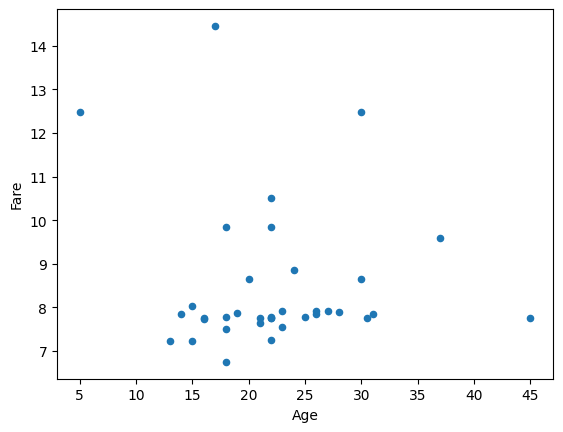

In [151]:
change_db2.loc[(change_db2['Title']=='Miss')&(change_db2['Pclass']==3)&(change_db2['SibSp']==0)&(change_db2['Parch']==0)].plot.scatter(x='Age',y='Fare')

<Axes: ylabel='Frequency'>

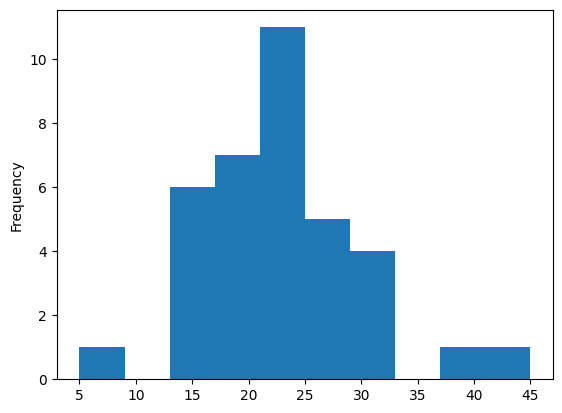

In [152]:
change_db2.loc[(change_db2['Title']=='Miss')&(change_db2['Pclass']==3)&(change_db2['SibSp']==0)&(change_db2['Parch']==0),'Age'].plot.hist()

In [153]:
change_db_cleaned.loc[(change_db_cleaned['Title']=='Miss')&(change_db_cleaned['Pclass']==3)&(change_db_cleaned['SibSp']==0)&(change_db_cleaned['Parch']==0),'Age'].median()

np.float64(22.0)

In [154]:
change_db_cleaned.loc[(change_db_cleaned['Title']=='Miss')&(change_db_cleaned['Pclass']==3)&(change_db_cleaned['SibSp']==0)&(change_db_cleaned['Parch']==0)&(change_db_cleaned['Age'].isnull()),'Age']=change_db_cleaned.loc[(change_db_cleaned['Title']=='Miss')&(change_db_cleaned['Pclass']==3)&(change_db_cleaned['SibSp']==0)&(change_db_cleaned['Parch']==0),'Age'].median()

In [155]:
change_db_cleaned.loc[(change_db_cleaned['Title']=='Miss')&(change_db_cleaned['Pclass']==3)&(change_db_cleaned['SibSp']==0)&(change_db_cleaned['Parch']==0),'Age'].describe()

count    55.000000
mean     22.172727
std       5.852523
min       5.000000
25%      20.500000
50%      22.000000
75%      22.500000
max      45.000000
Name: Age, dtype: float64

In [156]:
change_db2.loc[(change_db2['Title']=='Miss')&(change_db2['Pclass']==3)&(change_db2['SibSp']==0)&(change_db2['Parch']==0)].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,55.000000,55.000000,55.0,36.000000,55.0,55.0,55.000000
mean,396.890909,0.600000,3.0,22.263889,0.0,0.0,8.241975
std,267.521385,0.494413,0.0,7.267822,0.0,0.0,1.370905
min,3.000000,0.000000,3.0,5.000000,0.0,0.0,6.750000
25%,178.000000,0.000000,3.0,18.000000,0.0,0.0,7.750000
50%,360.000000,1.000000,3.0,22.000000,0.0,0.0,7.775000
75%,652.000000,1.000000,3.0,26.000000,0.0,0.0,7.925000
max,883.000000,1.000000,3.0,45.000000,0.0,0.0,14.458300


🧒 Imputed median age (22) for 'Miss' title (3rd class, 0 SibSp, 0 Parch)


In [157]:
change_db2.loc[(change_db2['Title']=='Mr')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,Owen Harris,NaN
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr,William Henry,NaN
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Moran,Mr,James,NaN
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,McCarthy,Mr,Timothy J,NaN
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S,Saundercock,Mr,William Henry,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S,Markun,Mr,Johann,NaN
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S,Banfield,Mr,Frederick James,NaN
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S,Sutehall,Mr,Henry Jr,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Behr,Mr,Karl Howell,NaN


In [158]:
change_db2.loc[(change_db2['Title']=='Mr')&(change_db2['Pclass']==2)&(change_db2['SibSp']==0)&(change_db2['Parch']==0)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0,NaN,S,Williams,Mr,Charles Eugene,NaN
20,21,0,2,"Fynney, Mr. Joseph J",male,35.0,0,0,239865,26.0,NaN,S,Fynney,Mr,Joseph J,NaN
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0,D56,S,Beesley,Mr,Lawrence,NaN
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5,NaN,S,Wheadon,Mr,Edward H,NaN
70,71,0,2,"Jenkin, Mr. Stephen Curnow",male,32.0,0,0,C.A. 33111,10.5,NaN,S,Jenkin,Mr,Stephen Curnow,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,809,0,2,"Meyer, Mr. August",male,39.0,0,0,248723,13.0,NaN,S,Meyer,Mr,August,NaN
812,813,0,2,"Slemen, Mr. Richard James",male,35.0,0,0,28206,10.5,NaN,S,Slemen,Mr,Richard James,NaN
841,842,0,2,"Mudd, Mr. Thomas Charles",male,16.0,0,0,S.O./P.P. 3,10.5,NaN,S,Mudd,Mr,Thomas Charles,NaN
864,865,0,2,"Gill, Mr. John William",male,24.0,0,0,233866,13.0,NaN,S,Gill,Mr,John William,NaN


In [159]:
change_db2.loc[(change_db2['Title']=='Mr')&(change_db2['Pclass']==2)&(change_db2['SibSp']==0)&(change_db2['Parch']==0)&(change_db2['Age'].isnull())]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,Williams,Mr,Charles Eugene,NaN
181,182,0,2,"Pernot, Mr. Rene",male,NaN,0,0,SC/PARIS 2131,15.0500,NaN,C,Pernot,Mr,Rene,NaN
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0000,NaN,S,Parkes,Mr,"Francis ""Frank""",NaN
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0000,NaN,S,Cunningham,Mr,Alfred Fleming,NaN
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0000,NaN,S,Campbell,Mr,William,NaN
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0000,NaN,S,Frost,Mr,"Anthony Wood ""Archie""",NaN
547,548,1,2,"Padro y Manent, Mr. Julian",male,NaN,0,0,SC/PARIS 2146,13.8625,NaN,C,Padro y Manent,Mr,Julian,NaN
674,675,0,2,"Watson, Mr. Ennis Hastings",male,NaN,0,0,239856,0.0000,NaN,S,Watson,Mr,Ennis Hastings,NaN
732,733,0,2,"Knight, Mr. Robert J",male,NaN,0,0,239855,0.0000,NaN,S,Knight,Mr,Robert J,NaN


In [160]:
change_db2.loc[(change_db2['Title']=='Mr')&(change_db2['Pclass']==2)&(change_db2['SibSp']==0)&(change_db2['Parch']==0)].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,66.000000,66.000000,66.0,57.000000,66.0,66.0,66.000000
mean,449.030303,0.106061,2.0,33.017544,0.0,0.0,14.334974
std,258.075002,0.310275,0.0,13.000675,0.0,0.0,11.989451
min,18.000000,0.000000,2.0,16.000000,0.0,0.0,0.000000
25%,230.000000,0.000000,2.0,24.000000,0.0,0.0,10.500000
50%,429.500000,0.000000,2.0,30.000000,0.0,0.0,13.000000
75%,690.750000,0.000000,2.0,39.000000,0.0,0.0,13.000000
max,884.000000,1.000000,2.0,70.000000,0.0,0.0,73.500000


<Axes: ylabel='Frequency'>

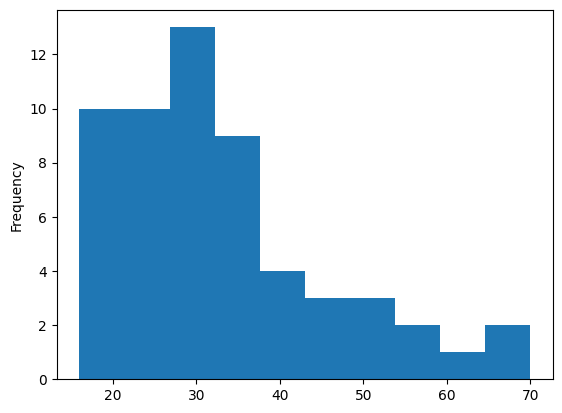

In [161]:
change_db2.loc[(change_db2['Title']=='Mr')&(change_db2['Pclass']==2)&(change_db2['SibSp']==0)&(change_db2['Parch']==0),'Age'].plot.hist()

In [162]:
change_db_cleaned.loc[(change_db_cleaned['Title']=='Mr')&(change_db_cleaned['Pclass']==2)&(change_db_cleaned['SibSp']==0)&(change_db_cleaned['Parch']==0),'Age'].median()

np.float64(30.0)

In [163]:
change_db_cleaned.loc[(change_db_cleaned['Title']=='Mr')&(change_db_cleaned['Pclass']==2)&(change_db_cleaned['SibSp']==0)&(change_db_cleaned['Parch']==0)&(change_db_cleaned['Age'].isnull()),'Age']=change_db_cleaned.loc[(change_db_cleaned['Title']=='Mr')&(change_db_cleaned['Pclass']==2)&(change_db_cleaned['SibSp']==0)&(change_db_cleaned['Parch']==0),'Age'].median()

👨 Imputed median age (30) for 'Mr' title (2nd class, 0 SibSp, 0 Parch)


In [164]:
change_db2.loc[(change_db2['Title']=='Mr')&(change_db2['Pclass']==1)&(change_db2['SibSp']==0)&(change_db2['Parch']==0)]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,McCarthy,Mr,Timothy J,NaN
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S,Sloper,Mr,William Thompson,NaN
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S,Woolner,Mr,Hugh,NaN
64,65,0,1,"Stewart, Mr. Albert A",male,NaN,0,0,PC 17605,27.7208,NaN,C,Stewart,Mr,Albert A,NaN
83,84,0,1,"Carrau, Mr. Francisco M",male,28.0,0,0,113059,47.1000,NaN,S,Carrau,Mr,Francisco M,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,840,1,1,"Marechal, Mr. Pierre",male,NaN,0,0,11774,29.7000,C47,C,Marechal,Mr,Pierre,NaN
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S,Daly,Mr,Peter Denis,NaN
867,868,0,1,"Roebling, Mr. Washington Augustus II",male,31.0,0,0,PC 17590,50.4958,A24,S,Roebling,Mr,Washington Augustus II,NaN
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S,Carlsson,Mr,Frans Olof,NaN


In [165]:
change_db2.loc[(change_db2['Title']=='Mr')&(change_db2['Pclass']==1)&(change_db2['Age'].isnull())&(change_db2['SibSp']==0)&(change_db2['Parch']==0)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S,Woolner,Mr,Hugh,NaN
64,65,0,1,"Stewart, Mr. Albert A",male,NaN,0,0,PC 17605,27.7208,NaN,C,Stewart,Mr,Albert A,NaN
168,169,0,1,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,NaN,S,Baumann,Mr,John D,NaN
185,186,0,1,"Rood, Mr. Hugh Roscoe",male,NaN,0,0,113767,50.0000,A32,S,Rood,Mr,Hugh Roscoe,NaN
270,271,0,1,"Cairns, Mr. Alexander",male,NaN,0,0,113798,31.0000,NaN,S,Cairns,Mr,Alexander,NaN
284,285,0,1,"Smith, Mr. Richard William",male,NaN,0,0,113056,26.0000,A19,S,Smith,Mr,Richard William,NaN
295,296,0,1,"Lewy, Mr. Ervin G",male,NaN,0,0,PC 17612,27.7208,NaN,C,Lewy,Mr,Ervin G,NaN
298,299,1,1,"Saalfeld, Mr. Adolphe",male,NaN,0,0,19988,30.5000,C106,S,Saalfeld,Mr,Adolphe,NaN
351,352,0,1,"Williams-Lambert, Mr. Fletcher Fellows",male,NaN,0,0,113510,35.0000,C128,S,Williams-Lambert,Mr,Fletcher Fellows,NaN
475,476,0,1,"Clifford, Mr. George Quincy",male,NaN,0,0,110465,52.0000,A14,S,Clifford,Mr,George Quincy,NaN


In [166]:
change_db2.loc[(change_db2['Title']=='Mr')&(change_db2['Pclass']==1)&(change_db2['SibSp']==0)&(change_db2['Parch']==0)].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,67.000000,67.000000,67.0,47.000000,67.0,67.0,67.000000
mean,473.656716,0.328358,1.0,44.372340,0.0,0.0,46.577984
std,244.940287,0.473160,0.0,14.363097,0.0,0.0,69.211695
min,7.000000,0.000000,1.0,22.000000,0.0,0.0,0.000000
25%,278.000000,0.000000,1.0,33.500000,0.0,0.0,26.550000
50%,493.000000,0.000000,1.0,45.000000,0.0,0.0,30.000000
75%,648.500000,1.000000,1.0,55.500000,0.0,0.0,37.000000
max,890.000000,1.000000,1.0,80.000000,0.0,0.0,512.329200


<Axes: ylabel='Frequency'>

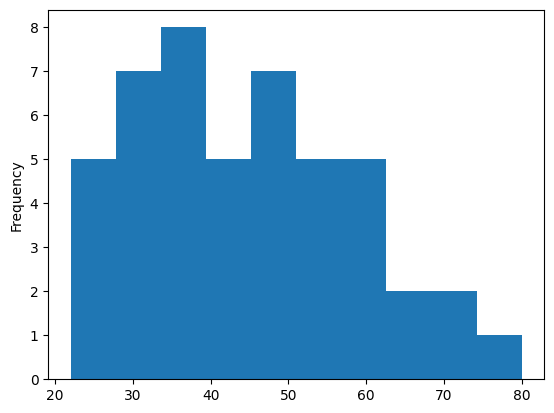

In [167]:
change_db2.loc[(change_db2['Title']=='Mr')&(change_db2['Pclass']==1)&(change_db2['SibSp']==0)&(change_db2['Parch']==0),'Age'].plot.hist()

In [168]:
change_db2.loc[(change_db2['Title']=='Mr')&(change_db2['Pclass']==1)&(change_db2['SibSp']==0)&(change_db2['Parch']==0)&(change_db2['Embarked']=='C')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
64,65,0,1,"Stewart, Mr. Albert A",male,NaN,0,0,PC 17605,27.7208,NaN,C,Stewart,Mr,Albert A,NaN
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,Goldschmidt,Mr,George B,NaN
139,140,0,1,"Giglio, Mr. Victor",male,24.0,0,0,PC 17593,79.2000,B86,C,Giglio,Mr,Victor,NaN
174,175,0,1,"Smith, Mr. James Clinch",male,56.0,0,0,17764,30.6958,A7,C,Smith,Mr,James Clinch,NaN
209,210,1,1,"Blank, Mr. Henry",male,40.0,0,0,112277,31.0000,A31,C,Blank,Mr,Henry,NaN
295,296,0,1,"Lewy, Mr. Ervin G",male,NaN,0,0,PC 17612,27.7208,NaN,C,Lewy,Mr,Ervin G,NaN
373,374,0,1,"Ringhini, Mr. Sante",male,22.0,0,0,PC 17760,135.6333,NaN,C,Ringhini,Mr,Sante,NaN
452,453,0,1,"Foreman, Mr. Benjamin Laventall",male,30.0,0,0,113051,27.7500,C111,C,Foreman,Mr,Benjamin Laventall,NaN
487,488,0,1,"Kent, Mr. Edward Austin",male,58.0,0,0,11771,29.7000,B37,C,Kent,Mr,Edward Austin,NaN
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,Artagaveytia,Mr,Ramon,NaN


In [169]:
change_db2.loc[(change_db2['Title']=='Mr')&(change_db2['Pclass']==1)&(change_db2['SibSp']==0)&(change_db2['Parch']==0)&(change_db2['Embarked']=='C')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
64,65,0,1,"Stewart, Mr. Albert A",male,NaN,0,0,PC 17605,27.7208,NaN,C,Stewart,Mr,Albert A,NaN
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,Goldschmidt,Mr,George B,NaN
139,140,0,1,"Giglio, Mr. Victor",male,24.0,0,0,PC 17593,79.2000,B86,C,Giglio,Mr,Victor,NaN
174,175,0,1,"Smith, Mr. James Clinch",male,56.0,0,0,17764,30.6958,A7,C,Smith,Mr,James Clinch,NaN
209,210,1,1,"Blank, Mr. Henry",male,40.0,0,0,112277,31.0000,A31,C,Blank,Mr,Henry,NaN
295,296,0,1,"Lewy, Mr. Ervin G",male,NaN,0,0,PC 17612,27.7208,NaN,C,Lewy,Mr,Ervin G,NaN
373,374,0,1,"Ringhini, Mr. Sante",male,22.0,0,0,PC 17760,135.6333,NaN,C,Ringhini,Mr,Sante,NaN
452,453,0,1,"Foreman, Mr. Benjamin Laventall",male,30.0,0,0,113051,27.7500,C111,C,Foreman,Mr,Benjamin Laventall,NaN
487,488,0,1,"Kent, Mr. Edward Austin",male,58.0,0,0,11771,29.7000,B37,C,Kent,Mr,Edward Austin,NaN
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,Artagaveytia,Mr,Ramon,NaN


In [170]:
change_db2.loc[(change_db2['Title']=='Mr')&(change_db2['Pclass']==1)&(change_db2['SibSp']==0)&(change_db2['Parch']==0)&(change_db2['Embarked']=='C')&(change_db2['Age'].isnull())]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
64,65,0,1,"Stewart, Mr. Albert A",male,NaN,0,0,PC 17605,27.7208,NaN,C,Stewart,Mr,Albert A,NaN
295,296,0,1,"Lewy, Mr. Ervin G",male,NaN,0,0,PC 17612,27.7208,NaN,C,Lewy,Mr,Ervin G,NaN
557,558,0,1,"Robbins, Mr. Victor",male,NaN,0,0,PC 17757,227.5250,NaN,C,Robbins,Mr,Victor,NaN
793,794,0,1,"Hoyt, Mr. William Fisher",male,NaN,0,0,PC 17600,30.6958,NaN,C,Hoyt,Mr,William Fisher,NaN
839,840,1,1,"Marechal, Mr. Pierre",male,NaN,0,0,11774,29.7000,C47,C,Marechal,Mr,Pierre,NaN


In [171]:
change_db2.loc[(change_db2['Title']=='Mr')&(change_db2['Pclass']==1)&(change_db2['SibSp']==0)&(change_db2['Parch']==0)&(change_db2['Embarked']=='C')].describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,19.000000,19.000000,19.0,14.000000,19.0,19.0,19.000000
mean,488.052632,0.315789,1.0,41.214286,0.0,0.0,80.338595
std,266.414146,0.477567,0.0,16.706418,0.0,0.0,116.005139
min,65.000000,0.000000,1.0,22.000000,0.0,0.0,26.550000
25%,253.000000,0.000000,1.0,27.750000,0.0,0.0,29.700000
50%,494.000000,0.000000,1.0,35.500000,0.0,0.0,31.000000
75%,710.000000,1.000000,1.0,53.500000,0.0,0.0,77.964600
max,890.000000,1.000000,1.0,71.000000,0.0,0.0,512.329200


In [172]:
round(change_db_cleaned.loc[(change_db_cleaned['Title']=='Mr')&(change_db_cleaned['Pclass']==1)&(change_db_cleaned['SibSp']==0)&(change_db_cleaned['Parch']==0)&(change_db_cleaned['Embarked']=='C'),'Age'].median())

36

In [173]:
change_db_cleaned.loc[(change_db_cleaned['Title']=='Mr')&(change_db_cleaned['Pclass']==1)&(change_db_cleaned['SibSp']==0)&(change_db_cleaned['Parch']==0)&(change_db_cleaned['Embarked']=='C')&(change_db_cleaned['Age'].isnull()),'Age']=round(change_db_cleaned.loc[(change_db_cleaned['Title']=='Mr')&(change_db_cleaned['Pclass']==1)&(change_db_cleaned['SibSp']==0)&(change_db_cleaned['Parch']==0)&(change_db_cleaned['Embarked']=='C'),'Age'].median())

In [174]:
change_db_cleaned.loc[(change_db_cleaned['Title']=='Mr')&(change_db_cleaned['Pclass']==1)&(change_db_cleaned['SibSp']==0)&(change_db_cleaned['Parch']==0)&(change_db_cleaned['Embarked']=='C'),'Age'].describe()

count    19.000000
mean     39.842105
std      14.392371
min      22.000000
25%      32.500000
50%      36.000000
75%      43.000000
max      71.000000
Name: Age, dtype: float64

In [175]:
change_db2.loc[(change_db2['Title']=='Mr')&(change_db2['Pclass']==1)&(change_db2['SibSp']==0)&(change_db2['Parch']==0)&(change_db2['Embarked']=='S')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,McCarthy,Mr,Timothy J,NaN
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S,Sloper,Mr,William Thompson,NaN
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S,Woolner,Mr,Hugh,NaN
83,84,0,1,"Carrau, Mr. Francisco M",male,28.0,0,0,113059,47.1000,NaN,S,Carrau,Mr,Francisco M,NaN
110,111,0,1,"Porter, Mr. Walter Chamberlain",male,47.0,0,0,110465,52.0000,C110,S,Porter,Mr,Walter Chamberlain,NaN
168,169,0,1,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,NaN,S,Baumann,Mr,John D,NaN
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,B19,S,Van der hoef,Mr,Wyckoff,NaN
185,186,0,1,"Rood, Mr. Hugh Roscoe",male,NaN,0,0,113767,50.0000,A32,S,Rood,Mr,Hugh Roscoe,NaN
187,188,1,1,"Romaine, Mr. Charles Hallace (""Mr C Rolmane"")",male,45.0,0,0,111428,26.5500,NaN,S,Romaine,Mr,Charles Hallace,"""Mr C Rolmane"""
252,253,0,1,"Stead, Mr. William Thomas",male,62.0,0,0,113514,26.5500,C87,S,Stead,Mr,William Thomas,NaN


In [176]:
change_db2.loc[(change_db2['Title']=='Mr')&(change_db2['Pclass']==1)&(change_db2['SibSp']==0)&(change_db2['Parch']==0)&(change_db2['Embarked']=='S')&(change_db2['Age'].isnull())]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S,Woolner,Mr,Hugh,NaN
168,169,0,1,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,NaN,S,Baumann,Mr,John D,NaN
185,186,0,1,"Rood, Mr. Hugh Roscoe",male,NaN,0,0,113767,50.0000,A32,S,Rood,Mr,Hugh Roscoe,NaN
270,271,0,1,"Cairns, Mr. Alexander",male,NaN,0,0,113798,31.0000,NaN,S,Cairns,Mr,Alexander,NaN
284,285,0,1,"Smith, Mr. Richard William",male,NaN,0,0,113056,26.0000,A19,S,Smith,Mr,Richard William,NaN
298,299,1,1,"Saalfeld, Mr. Adolphe",male,NaN,0,0,19988,30.5000,C106,S,Saalfeld,Mr,Adolphe,NaN
351,352,0,1,"Williams-Lambert, Mr. Fletcher Fellows",male,NaN,0,0,113510,35.0000,C128,S,Williams-Lambert,Mr,Fletcher Fellows,NaN
475,476,0,1,"Clifford, Mr. George Quincy",male,NaN,0,0,110465,52.0000,A14,S,Clifford,Mr,George Quincy,NaN
507,508,1,1,"Bradley, Mr. George (""George Arthur Brayton"")",male,NaN,0,0,111427,26.5500,NaN,S,Bradley,Mr,George,"""George Arthur Brayton"""
527,528,0,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,S,Farthing,Mr,John,NaN


In [177]:
change_db2.loc[(change_db2['Title']=='Mr')&(change_db2['Pclass']==1)&(change_db2['SibSp']==0)&(change_db2['Parch']==0)&(change_db2['Embarked']=='S')].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,48.000000,48.000000,48.0,33.000000,48.0,48.0,48.000000
mean,467.958333,0.333333,1.0,45.712121,0.0,0.0,33.214408
std,238.641809,0.476393,0.0,13.302391,0.0,0.0,30.492317
min,7.000000,0.000000,1.0,27.000000,0.0,0.0,0.000000
25%,281.500000,0.000000,1.0,35.000000,0.0,0.0,26.362500
50%,484.500000,0.000000,1.0,45.500000,0.0,0.0,27.525000
75%,631.750000,1.000000,1.0,55.000000,0.0,0.0,35.125000
max,873.000000,1.000000,1.0,80.000000,0.0,0.0,221.779200


In [178]:
change_db_cleaned.loc[(change_db_cleaned['Title']=='Mr')&(change_db_cleaned['Pclass']==1)&(change_db_cleaned['SibSp']==0)&(change_db_cleaned['Parch']==0)&(change_db_cleaned['Embarked']=='S')&(change_db_cleaned['Age'].isnull()),'Age']

55    NaN
168   NaN
185   NaN
270   NaN
284   NaN
298   NaN
351   NaN
475   NaN
507   NaN
527   NaN
602   NaN
633   NaN
711   NaN
740   NaN
815   NaN
Name: Age, dtype: float64

In [179]:
change_db_cleaned.loc[(change_db_cleaned['Title']=='Mr')&(change_db_cleaned['Pclass']==1)&(change_db_cleaned['SibSp']==0)&(change_db_cleaned['Parch']==0)&(change_db_cleaned['Embarked']=='S')&(change_db_cleaned['Age'].isnull()),'Age']=round(change_db_cleaned.loc[(change_db_cleaned['Title']=='Mr')&(change_db_cleaned['Pclass']==1)&(change_db_cleaned['SibSp']==0)&(change_db_cleaned['Parch']==0)&(change_db_cleaned['Embarked']=='S'),'Age'].median())

In [180]:
change_db_cleaned.loc[(change_db_cleaned['Title']=='Mr')&(change_db_cleaned['Pclass']==1)&(change_db_cleaned['SibSp']==0)&(change_db_cleaned['Parch']==0)&(change_db_cleaned['Embarked']=='S')].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,48.000000,48.000000,48.0,48.000000,48.0,48.0,48.000000
mean,467.958333,0.333333,1.0,45.802083,0.0,0.0,33.214408
std,238.641809,0.476393,0.0,10.977123,0.0,0.0,30.492317
min,7.000000,0.000000,1.0,27.000000,0.0,0.0,0.000000
25%,281.500000,0.000000,1.0,39.750000,0.0,0.0,26.362500
50%,484.500000,0.000000,1.0,46.000000,0.0,0.0,27.525000
75%,631.750000,1.000000,1.0,47.250000,0.0,0.0,35.125000
max,873.000000,1.000000,1.0,80.000000,0.0,0.0,221.779200


👨 Refined age imputation for 1st-class 'Mr' (0 SibSp, 0 Parch) by Embarked location ('C': 36, 'S': 46)


In [181]:
change_db2.loc[(change_db2['Title']=='Mr')&(change_db2['Pclass']==3)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,Owen Harris,NaN
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr,William Henry,NaN
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Moran,Mr,James,NaN
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S,Saundercock,Mr,William Henry,NaN
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S,Andersson,Mr,Anders Johan,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S,Petroff,Mr,Nedelio,NaN
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S,Laleff,Mr,Kristo,NaN
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S,Markun,Mr,Johann,NaN
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S,Sutehall,Mr,Henry Jr,NaN


In [182]:
change_db2.loc[(change_db2['Title']=='Mr')&(change_db2['Pclass']==3)&(change_db2['Age'].isnull())]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Moran,Mr,James,NaN
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,Emir,Mr,Farred Chehab,NaN
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S,Todoroff,Mr,Lalio,NaN
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C,Mamee,Mr,Hanna,NaN
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C,Kraeff,Mr,Theodor,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837,838,0,3,"Sirota, Mr. Maurice",male,NaN,0,0,392092,8.0500,NaN,S,Sirota,Mr,Maurice,NaN
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.5500,NaN,S,Sage,Mr,Douglas Bullen,NaN
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C,Razi,Mr,Raihed,NaN
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S,van Melkebeke,Mr,Philemon,NaN


`Mr` Title (`3rd class`,`2-SibSp`,`0-Parch`)-8 Passengers (2 Null values)

In [183]:
change_db2.loc[(change_db2['Title']=='Mr')&(change_db2['Pclass']==3)&(change_db2['SibSp']==2)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
48,49,0,3,"Samaan, Mr. Youssef",male,NaN,2,0,2662,21.6792,NaN,C,Samaan,Mr,Youssef,NaN
69,70,0,3,"Kink, Mr. Vincenz",male,26.0,2,0,315151,8.6625,NaN,S,Kink,Mr,Vincenz,NaN
104,105,0,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,NaN,S,Gustafsson,Mr,Anders Vilhelm,NaN
301,302,1,3,"McCoy, Mr. Bernard",male,NaN,2,0,367226,23.2500,NaN,Q,McCoy,Mr,Bernard,NaN
333,334,0,3,"Vander Planke, Mr. Leo Edmondus",male,16.0,2,0,345764,18.0000,NaN,S,Vander Planke,Mr,Leo Edmondus,NaN
392,393,0,3,"Gustafsson, Mr. Johan Birger",male,28.0,2,0,3101277,7.9250,NaN,S,Gustafsson,Mr,Johan Birger,NaN
565,566,0,3,"Davies, Mr. Alfred J",male,24.0,2,0,A/4 48871,24.1500,NaN,S,Davies,Mr,Alfred J,NaN
860,861,0,3,"Hansen, Mr. Claus Peter",male,41.0,2,0,350026,14.1083,NaN,S,Hansen,Mr,Claus Peter,NaN


In [184]:
change_db2.loc[(change_db2['Title']=='Mr')&(change_db2['Pclass']==3)&(change_db2['Age'].isnull())&(change_db2['SibSp']==2)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
48,49,0,3,"Samaan, Mr. Youssef",male,NaN,2,0,2662,21.6792,NaN,C,Samaan,Mr,Youssef,NaN
301,302,1,3,"McCoy, Mr. Bernard",male,NaN,2,0,367226,23.2500,NaN,Q,McCoy,Mr,Bernard,NaN


In [185]:
change_db2.loc[(change_db2['Title']=='Mr')&(change_db2['Pclass']==3)&(change_db2['SibSp']==2)].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,8.000000,8.000000,8.0,6.000000,8.0,8.0,8.000000
mean,335.000000,0.125000,3.0,28.666667,2.0,0.0,15.712500
std,277.594771,0.353553,0.0,9.070097,0.0,0.0,6.993934
min,49.000000,0.000000,3.0,16.000000,2.0,0.0,7.925000
25%,96.250000,0.000000,3.0,24.500000,2.0,0.0,8.478125
50%,318.000000,0.000000,3.0,27.000000,2.0,0.0,16.054150
75%,436.250000,0.000000,3.0,34.750000,2.0,0.0,22.071900
max,861.000000,1.000000,3.0,41.000000,2.0,0.0,24.150000


In [186]:
change_db_cleaned.loc[(change_db_cleaned['Title']=='Mr')&(change_db_cleaned['Pclass']==3)&(change_db_cleaned['SibSp']==2)&(change_db_cleaned['Parch']==0),'Age'].median()

np.float64(27.0)

In [187]:
change_db_cleaned.loc[(change_db_cleaned['Title']=='Mr')&(change_db_cleaned['Pclass']==3)&(change_db_cleaned['Age'].isnull())&(change_db_cleaned['SibSp']==2)&(change_db_cleaned['Parch']==0),'Age']=change_db_cleaned.loc[(change_db_cleaned['Title']=='Mr')&(change_db_cleaned['Pclass']==3)&(change_db_cleaned['SibSp']==2)&(change_db_cleaned['Parch']==0),'Age'].median()

In [188]:
change_db_cleaned.loc[(change_db_cleaned['Title']=='Mr')&(change_db_cleaned['Pclass']==3)&(change_db_cleaned['SibSp']==2)&(change_db_cleaned['Parch']==0)].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,8.000000,8.000000,8.0,8.000000,8.0,8.0,8.000000
mean,335.000000,0.125000,3.0,28.250000,2.0,0.0,15.712500
std,277.594771,0.353553,0.0,7.704359,0.0,0.0,6.993934
min,49.000000,0.000000,3.0,16.000000,2.0,0.0,7.925000
25%,96.250000,0.000000,3.0,25.500000,2.0,0.0,8.478125
50%,318.000000,0.000000,3.0,27.000000,2.0,0.0,16.054150
75%,436.250000,0.000000,3.0,30.250000,2.0,0.0,22.071900
max,861.000000,1.000000,3.0,41.000000,2.0,0.0,24.150000


👨 Imputed median (27) for 3rd-class 'Mr' passengers (2 SibSp, 0 Parch) with missing age values

`Mr` Title (`3rd class`,`8-SibSp`,`2-Parch`)-3 Passengers (3 Null Age values)

In [189]:
change_db2.loc[(change_db2['Title']=='Mr')&(change_db2['Pclass']==3)&(change_db2['SibSp']==8)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S,Sage,Mr,Frederick,NaN
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S,Sage,Mr,George John Jr,NaN
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S,Sage,Mr,Douglas Bullen,NaN


👨 Left age values as null for 3rd-class 'Mr' passengers (8 SibSp, 2 Parch) due to lack of reliable data

In [190]:
change_db2.loc[(change_db2['Title']=='Mr')&(change_db2['Pclass']==3)&(change_db2['SibSp']==1)&(change_db2['Parch']==2)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
93,94,0,3,"Dean, Mr. Bertram Frank",male,26.0,1,2,C.A. 2315,20.575,NaN,S,Dean,Mr,Bertram Frank,NaN
783,784,0,3,"Johnston, Mr. Andrew G",male,NaN,1,2,W./C. 6607,23.450,NaN,S,Johnston,Mr,Andrew G,NaN


In [191]:
change_db2.loc[(change_db2['Title']=='Mr')&(change_db2['Pclass']==3)&(change_db2['SibSp']==1)&(change_db2['Parch']==2),'LastName'].unique()

array(['Dean', 'Johnston'], dtype=object)

In [192]:
change_db2.loc[change_db2['Ticket'].isin(change_db2.loc[(change_db2['Title']=='Mr')&(change_db2['Pclass']==3)&(change_db2['SibSp']==1)&(change_db2['Parch']==2),'Ticket'].unique())].sort_values('LastName')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
93,94,0,3,"Dean, Mr. Bertram Frank",male,26.0,1,2,C.A. 2315,20.575,NaN,S,Dean,Mr,Bertram Frank,NaN
788,789,1,3,"Dean, Master. Bertram Vere",male,1.0,1,2,C.A. 2315,20.575,NaN,S,Dean,Master,Bertram Vere,NaN
783,784,0,3,"Johnston, Mr. Andrew G",male,NaN,1,2,W./C. 6607,23.450,NaN,S,Johnston,Mr,Andrew G,NaN
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.450,NaN,S,Johnston,Miss,"Catherine Helen ""Carrie""",NaN


👨 Left age null for 3rd-class 'Mr' (1 SibSp, 2 Parch) due to unavailable family reference

In [193]:
change_db2.loc[(change_db2['Title']=='Mr')&(change_db2['Pclass']==3)&(change_db2['SibSp']==1)&(change_db2['Parch']==0)].sort_values('Age')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
721,722,0,3,"Jensen, Mr. Svend Lauritz",male,17.0,1,0,350048,7.0542,NaN,S,Jensen,Mr,Svend Lauritz,NaN
371,372,0,3,"Wiklund, Mr. Jakob Alfred",male,18.0,1,0,3101267,6.4958,NaN,S,Wiklund,Mr,Jakob Alfred,NaN
664,665,1,3,"Lindqvist, Mr. Eino William",male,20.0,1,0,STON/O 2. 3101285,7.9250,NaN,S,Lindqvist,Mr,Eino William,NaN
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,Owen Harris,NaN
743,744,0,3,"McNamee, Mr. Neal",male,24.0,1,0,376566,16.1000,NaN,S,McNamee,Mr,Neal,NaN
442,443,0,3,"Petterson, Mr. Johan Emil",male,25.0,1,0,347076,7.7750,NaN,S,Petterson,Mr,Johan Emil,NaN
267,268,1,3,"Persson, Mr. Ernst Ulrik",male,25.0,1,0,347083,7.7750,NaN,S,Persson,Mr,Ernst Ulrik,NaN
353,354,0,3,"Arnold-Franchi, Mr. Josef",male,25.0,1,0,349237,17.8000,NaN,S,Arnold-Franchi,Mr,Josef,NaN
704,705,0,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,350025,7.8542,NaN,S,Hansen,Mr,Henrik Juul,NaN
73,74,0,3,"Chronopoulos, Mr. Apostolos",male,26.0,1,0,2680,14.4542,NaN,C,Chronopoulos,Mr,Apostolos,NaN


In [194]:
change_db2.loc[(change_db2['Title']=='Mr')&(change_db2['Pclass']==3)&(change_db2['SibSp']==1)&(change_db2['Parch']==0)&(change_db2['Age'].isnull())]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
46,47,0,3,"Lennon, Mr. Denis",male,NaN,1,0,370371,15.5000,NaN,Q,Lennon,Mr,Denis,NaN
214,215,0,3,"Kiernan, Mr. Philip",male,NaN,1,0,367229,7.7500,NaN,Q,Kiernan,Mr,Philip,NaN
364,365,0,3,"O'Brien, Mr. Thomas",male,NaN,1,0,370365,15.5000,NaN,Q,O'Brien,Mr,Thomas,NaN
451,452,0,3,"Hagland, Mr. Ingvald Olai Olsen",male,NaN,1,0,65303,19.9667,NaN,S,Hagland,Mr,Ingvald Olai Olsen,NaN
490,491,0,3,"Hagland, Mr. Konrad Mathias Reiersen",male,NaN,1,0,65304,19.9667,NaN,S,Hagland,Mr,Konrad Mathias Reiersen,NaN
639,640,0,3,"Thorneycroft, Mr. Percival",male,NaN,1,0,376564,16.1000,NaN,S,Thorneycroft,Mr,Percival,NaN
768,769,0,3,"Moran, Mr. Daniel J",male,NaN,1,0,371110,24.1500,NaN,Q,Moran,Mr,Daniel J,NaN


In [195]:
change_db2.loc[(change_db2['Title']=='Mr')&(change_db2['Pclass']==3)&(change_db2['SibSp']==1)&(change_db2['Parch']==0)].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,23.000000,23.000000,23.0,16.000000,23.0,23.0,23.000000
mean,430.304348,0.086957,3.0,25.625000,1.0,0.0,13.228991
std,230.862500,0.288104,0.0,4.951431,0.0,0.0,5.187853
min,1.000000,0.000000,3.0,17.000000,1.0,0.0,6.495800
25%,261.000000,0.000000,3.0,23.500000,1.0,0.0,7.775000
50%,443.000000,0.000000,3.0,25.500000,1.0,0.0,15.500000
75%,630.500000,0.000000,3.0,28.250000,1.0,0.0,16.100000
max,769.000000,1.000000,3.0,36.000000,1.0,0.0,24.150000


In [196]:
change_db2.loc[(change_db2['Title']=='Mr')&(change_db2['Pclass']==3)&(change_db2['SibSp']==1)&(change_db2['Parch']==0)&(change_db2['Embarked']=='S')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,Owen Harris,NaN
206,207,0,3,"Backstrom, Mr. Karl Alfred",male,32.0,1,0,3101278,15.8500,NaN,S,Backstrom,Mr,Karl Alfred,NaN
253,254,0,3,"Lobb, Mr. William Arthur",male,30.0,1,0,A/5. 3336,16.1000,NaN,S,Lobb,Mr,William Arthur,NaN
267,268,1,3,"Persson, Mr. Ernst Ulrik",male,25.0,1,0,347083,7.7750,NaN,S,Persson,Mr,Ernst Ulrik,NaN
353,354,0,3,"Arnold-Franchi, Mr. Josef",male,25.0,1,0,349237,17.8000,NaN,S,Arnold-Franchi,Mr,Josef,NaN
371,372,0,3,"Wiklund, Mr. Jakob Alfred",male,18.0,1,0,3101267,6.4958,NaN,S,Wiklund,Mr,Jakob Alfred,NaN
403,404,0,3,"Hakkarainen, Mr. Pekka Pietari",male,28.0,1,0,STON/O2. 3101279,15.8500,NaN,S,Hakkarainen,Mr,Pekka Pietari,NaN
442,443,0,3,"Petterson, Mr. Johan Emil",male,25.0,1,0,347076,7.7750,NaN,S,Petterson,Mr,Johan Emil,NaN
451,452,0,3,"Hagland, Mr. Ingvald Olai Olsen",male,NaN,1,0,65303,19.9667,NaN,S,Hagland,Mr,Ingvald Olai Olsen,NaN
477,478,0,3,"Braund, Mr. Lewis Richard",male,29.0,1,0,3460,7.0458,NaN,S,Braund,Mr,Lewis Richard,NaN


In [197]:
change_db2.loc[(change_db2['Title']=='Mr')&(change_db2['Pclass']==3)&(change_db2['SibSp']==1)&(change_db2['Parch']==0)&(change_db2['Embarked']=='S')&(change_db2['Age'].isnull())]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
451,452,0,3,"Hagland, Mr. Ingvald Olai Olsen",male,NaN,1,0,65303,19.9667,NaN,S,Hagland,Mr,Ingvald Olai Olsen,NaN
490,491,0,3,"Hagland, Mr. Konrad Mathias Reiersen",male,NaN,1,0,65304,19.9667,NaN,S,Hagland,Mr,Konrad Mathias Reiersen,NaN
639,640,0,3,"Thorneycroft, Mr. Percival",male,NaN,1,0,376564,16.1000,NaN,S,Thorneycroft,Mr,Percival,NaN


In [198]:
change_db2.loc[(change_db2['Title']=='Mr')&(change_db2['Pclass']==3)&(change_db2['SibSp']==1)&(change_db2['Parch']==0)&(change_db2['Embarked']=='S')].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,17.000000,17.000000,17.0,14.000000,17.0,17.0,17.000000
mean,459.176471,0.117647,3.0,25.500000,1.0,0.0,12.497553
std,206.579051,0.332106,0.0,5.302394,0.0,0.0,5.125938
min,1.000000,0.000000,3.0,17.000000,1.0,0.0,6.495800
25%,354.000000,0.000000,3.0,22.500000,1.0,0.0,7.775000
50%,452.000000,0.000000,3.0,25.000000,1.0,0.0,15.550000
75%,640.000000,0.000000,3.0,28.750000,1.0,0.0,16.100000
max,744.000000,1.000000,3.0,36.000000,1.0,0.0,19.966700


In [199]:
change_db_cleaned.loc[(change_db_cleaned['Title']=='Mr')&(change_db_cleaned['Pclass']==3)&(change_db_cleaned['SibSp']==1)&(change_db_cleaned['Parch']==0)&(change_db_cleaned['Embarked']=='S'),'Age'].median()

np.float64(25.0)

In [200]:
change_db_cleaned.loc[(change_db_cleaned['Title']=='Mr')&(change_db_cleaned['Pclass']==3)&(change_db_cleaned['SibSp']==1)&(change_db_cleaned['Parch']==0)&(change_db_cleaned['Embarked']=='S')&(change_db_cleaned['Age'].isnull()),'Age']=change_db_cleaned.loc[(change_db_cleaned['Title']=='Mr')&(change_db_cleaned['Pclass']==3)&(change_db_cleaned['SibSp']==1)&(change_db_cleaned['Parch']==0)&(change_db_cleaned['Embarked']=='S'),'Age'].median()

In [201]:
change_db_cleaned.loc[(change_db_cleaned['Title']=='Mr')&(change_db_cleaned['Pclass']==3)&(change_db_cleaned['SibSp']==1)&(change_db_cleaned['Parch']==0)&(change_db_cleaned['Embarked']=='S')].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,17.000000,17.000000,17.0,17.000000,17.0,17.0,17.000000
mean,459.176471,0.117647,3.0,25.411765,1.0,0.0,12.497553
std,206.579051,0.332106,0.0,4.783550,0.0,0.0,5.125938
min,1.000000,0.000000,3.0,17.000000,1.0,0.0,6.495800
25%,354.000000,0.000000,3.0,24.000000,1.0,0.0,7.775000
50%,452.000000,0.000000,3.0,25.000000,1.0,0.0,15.550000
75%,640.000000,0.000000,3.0,28.000000,1.0,0.0,16.100000
max,744.000000,1.000000,3.0,36.000000,1.0,0.0,19.966700


👨 Imputed median age (25) for 3rd-class 'Mr' (1 SibSp, 0 Parch, Embarked = 'S'); includes 2 siblings

In [202]:
change_db2.loc[(change_db2['Title']=='Mr')&(change_db2['Pclass']==3)&(change_db2['SibSp']==1)&(change_db2['Parch']==0)&(change_db2['Embarked']=='Q')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
46,47,0,3,"Lennon, Mr. Denis",male,NaN,1,0,370371,15.50,NaN,Q,Lennon,Mr,Denis,NaN
214,215,0,3,"Kiernan, Mr. Philip",male,NaN,1,0,367229,7.75,NaN,Q,Kiernan,Mr,Philip,NaN
364,365,0,3,"O'Brien, Mr. Thomas",male,NaN,1,0,370365,15.50,NaN,Q,O'Brien,Mr,Thomas,NaN
768,769,0,3,"Moran, Mr. Daniel J",male,NaN,1,0,371110,24.15,NaN,Q,Moran,Mr,Daniel J,NaN


In [203]:
change_db2.loc[(change_db2['Title']=='Mr')&(change_db2['Pclass']==3)&(change_db2['SibSp']==1)&(change_db2['Parch']==0)&(change_db2['Embarked']=='Q')].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,4.000000,4.0,4.0,0.0,4.0,4.0,4.000000
mean,349.000000,0.0,3.0,NaN,1.0,0.0,15.725000
std,308.661627,0.0,0.0,NaN,0.0,0.0,6.700311
min,47.000000,0.0,3.0,NaN,1.0,0.0,7.750000
25%,173.000000,0.0,3.0,NaN,1.0,0.0,13.562500
50%,290.000000,0.0,3.0,NaN,1.0,0.0,15.500000
75%,466.000000,0.0,3.0,NaN,1.0,0.0,17.662500
max,769.000000,0.0,3.0,NaN,1.0,0.0,24.150000


In [204]:
change_db_cleaned.loc[(change_db_cleaned['Title']=='Mr')&(change_db_cleaned['Pclass']==3)&(change_db_cleaned['SibSp']==1)&(change_db_cleaned['Parch']==0),'Age'].median()

np.float64(25.0)

In [205]:
change_db_cleaned.loc[(change_db_cleaned['Title']=='Mr')&(change_db_cleaned['Pclass']==3)&(change_db_cleaned['SibSp']==1)&(change_db_cleaned['Parch']==0)&(change_db_cleaned['Age'].isnull()),'Age']

46    NaN
214   NaN
364   NaN
768   NaN
Name: Age, dtype: float64

In [206]:
change_db_cleaned.loc[(change_db_cleaned['Title']=='Mr')&(change_db_cleaned['Pclass']==3)&(change_db_cleaned['SibSp']==1)&(change_db_cleaned['Parch']==0)&(change_db_cleaned['Age'].isnull()),'Age']=change_db_cleaned.loc[(change_db_cleaned['Title']=='Mr')&(change_db_cleaned['Pclass']==3)&(change_db_cleaned['SibSp']==1)&(change_db_cleaned['Parch']==0),'Age'].median()

In [207]:
change_db_cleaned.loc[(change_db_cleaned['Title']=='Mr')&(change_db_cleaned['Pclass']==3)&(change_db_cleaned['SibSp']==1)&(change_db_cleaned['Parch']==0)].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,23.000000,23.000000,23.0,23.000000,23.0,23.0,23.000000
mean,430.304348,0.086957,3.0,25.434783,1.0,0.0,13.228991
std,230.862500,0.288104,0.0,4.099070,0.0,0.0,5.187853
min,1.000000,0.000000,3.0,17.000000,1.0,0.0,6.495800
25%,261.000000,0.000000,3.0,25.000000,1.0,0.0,7.775000
50%,443.000000,0.000000,3.0,25.000000,1.0,0.0,15.500000
75%,630.500000,0.000000,3.0,26.500000,1.0,0.0,16.100000
max,769.000000,1.000000,3.0,36.000000,1.0,0.0,24.150000


👨 Imputed median age (25) for 3rd-class 'Mr' (1 SibSp, 0 Parch, Embarked = 'Q'); no internal age data available

In [208]:
change_db2.loc[(change_db2['Title']=='Mr')&(change_db2['Pclass']==3)&(change_db2['SibSp']==0)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr,William Henry,NaN
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Moran,Mr,James,NaN
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S,Saundercock,Mr,William Henry,NaN
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,Emir,Mr,Farred Chehab,NaN
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S,Todoroff,Mr,Lalio,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S,Petroff,Mr,Nedelio,NaN
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S,Laleff,Mr,Kristo,NaN
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S,Markun,Mr,Johann,NaN
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S,Sutehall,Mr,Henry Jr,NaN


In [209]:
change_db2.loc[(change_db2['Title']=='Mr')&(change_db2['Pclass']==3)&(change_db2['SibSp']==0)&(change_db2['Age'].isnull())]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Moran,Mr,James,NaN
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,Emir,Mr,Farred Chehab,NaN
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S,Todoroff,Mr,Lalio,NaN
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C,Mamee,Mr,Hanna,NaN
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C,Kraeff,Mr,Theodor,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
832,833,0,3,"Saad, Mr. Amin",male,NaN,0,0,2671,7.2292,NaN,C,Saad,Mr,Amin,NaN
837,838,0,3,"Sirota, Mr. Maurice",male,NaN,0,0,392092,8.0500,NaN,S,Sirota,Mr,Maurice,NaN
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C,Razi,Mr,Raihed,NaN
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S,van Melkebeke,Mr,Philemon,NaN


In [210]:
change_db2.loc[(change_db2['Title']=='Mr')&(change_db2['Pclass']==3)&(change_db2['SibSp']==0)&(change_db2['Parch']==0)].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,264.000000,264.000000,264.0,187.000000,264.0,264.0,264.000000
mean,473.265152,0.121212,3.0,29.184492,0.0,0.0,9.507808
std,257.838378,0.326994,0.0,10.765183,0.0,0.0,8.181015
min,5.000000,0.000000,3.0,11.000000,0.0,0.0,0.000000
25%,241.000000,0.000000,3.0,21.000000,0.0,0.0,7.650000
50%,495.500000,0.000000,3.0,27.000000,0.0,0.0,7.895800
75%,694.750000,0.000000,3.0,33.500000,0.0,0.0,8.050000
max,891.000000,1.000000,3.0,74.000000,0.0,0.0,56.495800


In [211]:
change_db2.loc[(change_db2['Title']=='Mr')&(change_db2['Pclass']==3)&(change_db2['SibSp']==0)&(change_db2['Parch']==0)&(change_db2['Embarked']=='C')].sort_values('Age')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
731,732,0,3,"Hassan, Mr. Houssein G N",male,11.0,0,0,2699,18.7875,NaN,C,Hassan,Mr,Houssein G N,NaN
378,379,0,3,"Betros, Mr. Tannous",male,20.0,0,0,2648,4.0125,NaN,C,Betros,Mr,Tannous,NaN
762,763,1,3,"Barah, Mr. Hanna Assi",male,20.0,0,0,2663,7.2292,NaN,C,Barah,Mr,Hanna Assi,NaN
60,61,0,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C,Sirayanian,Mr,Orsen,NaN
553,554,1,3,"Leeni, Mr. Fahim (""Philip Zenni"")",male,22.0,0,0,2620,7.2250,NaN,C,Leeni,Mr,Fahim,"""Philip Zenni"""
296,297,0,3,"Hanna, Mr. Mansour",male,23.5,0,0,2693,7.2292,NaN,C,Hanna,Mr,Mansour,NaN
693,694,0,3,"Saad, Mr. Khalil",male,25.0,0,0,2672,7.2250,NaN,C,Saad,Mr,Khalil,NaN
207,208,1,3,"Albimona, Mr. Nassef Cassem",male,26.0,0,0,2699,18.7875,NaN,C,Albimona,Mr,Nassef Cassem,NaN
57,58,0,3,"Novel, Mr. Mansouer",male,28.5,0,0,2697,7.2292,NaN,C,Novel,Mr,Mansouer,NaN
455,456,1,3,"Jalsevac, Mr. Ivan",male,29.0,0,0,349240,7.8958,NaN,C,Jalsevac,Mr,Ivan,NaN


In [212]:
change_db_cleaned.loc[(change_db_cleaned['Title']=='Mr')&(change_db_cleaned['Pclass']==3)&(change_db_cleaned['SibSp']==0)&(change_db_cleaned['Parch']==0)&(change_db_cleaned['Embarked']=='C')&(change_db_cleaned['Age'].isnull())]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,Emir,Mr,Farred Chehab,NaN
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C,Mamee,Mr,Hanna,NaN
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C,Kraeff,Mr,Theodor,NaN
354,355,0,3,"Yousif, Mr. Wazli",male,NaN,0,0,2647,7.2250,NaN,C,Yousif,Mr,Wazli,NaN
420,421,0,3,"Gheorgheff, Mr. Stanio",male,NaN,0,0,349254,7.8958,NaN,C,Gheorgheff,Mr,Stanio,NaN
495,496,0,3,"Yousseff, Mr. Gerious",male,NaN,0,0,2627,14.4583,NaN,C,Yousseff,Mr,Gerious,NaN
522,523,0,3,"Lahoud, Mr. Sarkis",male,NaN,0,0,2624,7.2250,NaN,C,Lahoud,Mr,Sarkis,NaN
524,525,0,3,"Kassem, Mr. Fared",male,NaN,0,0,2700,7.2292,NaN,C,Kassem,Mr,Fared,NaN
531,532,0,3,"Toufik, Mr. Nakli",male,NaN,0,0,2641,7.2292,NaN,C,Toufik,Mr,Nakli,NaN
568,569,0,3,"Doharr, Mr. Tannous",male,NaN,0,0,2686,7.2292,NaN,C,Doharr,Mr,Tannous,NaN


In [213]:
change_db_cleaned.loc[(change_db_cleaned['Title']=='Mr')&(change_db_cleaned['Pclass']==3)&(change_db_cleaned['SibSp']==0)&(change_db_cleaned['Parch']==0)&(change_db_cleaned['Embarked']=='C'),'Age'].median()

np.float64(28.75)

In [214]:
change_db_cleaned.loc[(change_db_cleaned['Title']=='Mr')&(change_db_cleaned['Pclass']==3)&(change_db_cleaned['SibSp']==0)&(change_db_cleaned['Parch']==0)&(change_db_cleaned['Embarked']=='C')&(change_db_cleaned['Age'].isnull()),'Age']=round(change_db_cleaned.loc[(change_db_cleaned['Title']=='Mr')&(change_db_cleaned['Pclass']==3)&(change_db_cleaned['SibSp']==0)&(change_db_cleaned['Parch']==0)&(change_db_cleaned['Embarked']=='C'),'Age'].median())

In [215]:
change_db_cleaned.loc[(change_db_cleaned['Title']=='Mr')&(change_db_cleaned['Pclass']==3)&(change_db_cleaned['SibSp']==0)&(change_db_cleaned['Parch']==0)&(change_db_cleaned['Embarked']=='C')].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,33.000000,33.000000,33.0,33.000000,33.0,33.0,33.000000
mean,466.666667,0.151515,3.0,28.575758,0.0,0.0,8.215409
std,271.653233,0.364110,0.0,5.934698,0.0,0.0,3.086274
min,27.000000,0.000000,3.0,11.000000,0.0,0.0,4.012500
25%,245.000000,0.000000,3.0,28.500000,0.0,0.0,7.225000
50%,523.000000,0.000000,3.0,29.000000,0.0,0.0,7.229200
75%,694.000000,0.000000,3.0,29.000000,0.0,0.0,7.895800
max,860.000000,1.000000,3.0,45.500000,0.0,0.0,18.787500


👨 Imputed median age (28.75) rounded off to 29 for 3rd-class 'Mr' passengers (0 SibSp, 0 Parch, Embarked = 'C')

In [216]:
change_db2.loc[(change_db2['Title']=='Mr')&(change_db2['Pclass']==3)&(change_db2['SibSp']==0)&(change_db2['Parch']==0)&(change_db2['Embarked']=='Q')].sort_values('Age')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
143,144,0,3,"Burke, Mr. Jeremiah",male,19.0,0,0,365222,6.7500,NaN,Q,Burke,Mr,Jeremiah,NaN
421,422,0,3,"Charters, Mr. David",male,21.0,0,0,A/5. 13032,7.7333,NaN,Q,Charters,Mr,David,NaN
703,704,0,3,"Gallagher, Mr. Martin",male,25.0,0,0,36864,7.7417,NaN,Q,Gallagher,Mr,Martin,NaN
510,511,1,3,"Daly, Mr. Eugene Patrick",male,29.0,0,0,382651,7.7500,NaN,Q,Daly,Mr,Eugene Patrick,NaN
749,750,0,3,"Connaghton, Mr. Michael",male,31.0,0,0,335097,7.7500,NaN,Q,Connaghton,Mr,Michael,NaN
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q,Dooley,Mr,Patrick,NaN
525,526,0,3,"Farrell, Mr. James",male,40.5,0,0,367232,7.7500,NaN,Q,Farrell,Mr,James,NaN
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q,Duane,Mr,Frank,NaN
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q,Connors,Mr,Patrick,NaN
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Moran,Mr,James,NaN


In [217]:
change_db2.loc[(change_db2['Title']=='Mr')&(change_db2['Pclass']==3)&(change_db2['SibSp']==0)&(change_db2['Parch']==0)&(change_db2['Embarked']=='Q')].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,29.000000,29.000000,29.0,9.000000,29.0,29.0,29.000000
mean,506.655172,0.068966,3.0,37.000000,0.0,0.0,8.513648
std,245.110802,0.257881,0.0,18.599395,0.0,0.0,3.354399
min,6.000000,0.000000,3.0,19.000000,0.0,0.0,6.750000
25%,389.000000,0.000000,3.0,25.000000,0.0,0.0,7.737500
50%,518.000000,0.000000,3.0,31.000000,0.0,0.0,7.750000
75%,719.000000,0.000000,3.0,40.500000,0.0,0.0,7.750000
max,891.000000,1.000000,3.0,70.500000,0.0,0.0,24.150000


🤷 Left 'Mr' (3rd class, 0 SibSp, 0 Parch, Embarked = Q) ages as null due to insufficient data (only 9 present)

In [218]:
change_db2.loc[(change_db2['Title']=='Mr')&(change_db2['Pclass']==3)&(change_db2['SibSp']==0)&(change_db2['Parch']==0)&(change_db2['Embarked']=='S')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr,William Henry,NaN
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S,Saundercock,Mr,William Henry,NaN
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S,Todoroff,Mr,Lalio,NaN
37,38,0,3,"Cann, Mr. Ernest Charles",male,21.0,0,0,A./5. 2152,8.0500,NaN,S,Cann,Mr,Ernest Charles,NaN
45,46,0,3,"Rogers, Mr. William John",male,NaN,0,0,S.C./A.4. 23567,8.0500,NaN,S,Rogers,Mr,William John,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S,Gustafsson,Mr,Alfred Ossian,NaN
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S,Petroff,Mr,Nedelio,NaN
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S,Laleff,Mr,Kristo,NaN
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S,Markun,Mr,Johann,NaN


In [219]:
change_db2.loc[(change_db2['Title']=='Mr')&(change_db2['Pclass']==3)&(change_db2['SibSp']==0)&(change_db2['Parch']==0)&(change_db2['Embarked']=='S')&(change_db2['Age'].isnull())]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S,Todoroff,Mr,Lalio,NaN
45,46,0,3,"Rogers, Mr. William John",male,NaN,0,0,S.C./A.4. 23567,8.0500,NaN,S,Rogers,Mr,William John,NaN
76,77,0,3,"Staneff, Mr. Ivan",male,NaN,0,0,349208,7.8958,NaN,S,Staneff,Mr,Ivan,NaN
77,78,0,3,"Moutal, Mr. Rahamin Haim",male,NaN,0,0,374746,8.0500,NaN,S,Moutal,Mr,Rahamin Haim,NaN
87,88,0,3,"Slocovski, Mr. Selman Francis",male,NaN,0,0,SOTON/OQ 392086,8.0500,NaN,S,Slocovski,Mr,Selman Francis,NaN
95,96,0,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.0500,NaN,S,Shorney,Mr,Charles Joseph,NaN
101,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S,Petroff,Mr,Pastcho,"""Pentcho"""
107,108,1,3,"Moss, Mr. Albert Johan",male,NaN,0,0,312991,7.7750,NaN,S,Moss,Mr,Albert Johan,NaN
121,122,0,3,"Moore, Mr. Leonard Charles",male,NaN,0,0,A4. 54510,8.0500,NaN,S,Moore,Mr,Leonard Charles,NaN
154,155,0,3,"Olsen, Mr. Ole Martin",male,NaN,0,0,Fa 265302,7.3125,NaN,S,Olsen,Mr,Ole Martin,NaN


In [220]:
change_db2.loc[(change_db2['Title']=='Mr')&(change_db2['Pclass']==3)&(change_db2['SibSp']==0)&(change_db2['Parch']==0)&(change_db2['Embarked']=='S')].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,202.000000,202.000000,202.0,160.000000,202.0,202.0,202.000000
mean,469.549505,0.123762,3.0,28.853125,0.0,0.0,9.861668
std,258.239081,0.330128,0.0,10.364974,0.0,0.0,9.162272
min,5.000000,0.000000,3.0,16.000000,0.0,0.0,0.000000
25%,226.500000,0.000000,3.0,21.000000,0.0,0.0,7.775000
50%,486.000000,0.000000,3.0,26.000000,0.0,0.0,7.895800
75%,688.750000,0.000000,3.0,33.250000,0.0,0.0,8.050000
max,885.000000,1.000000,3.0,74.000000,0.0,0.0,56.495800


In [221]:
change_db_cleaned.loc[(change_db_cleaned['Title']=='Mr')&(change_db_cleaned['Pclass']==3)&(change_db_cleaned['SibSp']==0)&(change_db_cleaned['Parch']==0)&(change_db_cleaned['Embarked']=='S')&(change_db_cleaned['Age'].isnull()),'Age']=round(change_db_cleaned.loc[(change_db_cleaned['Title']=='Mr')&(change_db_cleaned['Pclass']==3)&(change_db_cleaned['SibSp']==0)&(change_db_cleaned['Parch']==0)&(change_db_cleaned['Embarked']=='S'),'Age'].median())

In [222]:
change_db_cleaned.loc[(change_db_cleaned['Title']=='Mr')&(change_db_cleaned['Pclass']==3)&(change_db_cleaned['SibSp']==0)&(change_db_cleaned['Parch']==0)&(change_db_cleaned['Embarked']=='S')].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,202.000000,202.000000,202.0,202.000000,202.0,202.0,202.000000
mean,469.549505,0.123762,3.0,28.259901,0.0,0.0,9.861668
std,258.239081,0.330128,0.0,9.291468,0.0,0.0,9.162272
min,5.000000,0.000000,3.0,16.000000,0.0,0.0,0.000000
25%,226.500000,0.000000,3.0,22.000000,0.0,0.0,7.775000
50%,486.000000,0.000000,3.0,26.000000,0.0,0.0,7.895800
75%,688.750000,0.000000,3.0,32.000000,0.0,0.0,8.050000
max,885.000000,1.000000,3.0,74.000000,0.0,0.0,56.495800


🧑 Imputed median age (26) for 'Mr' (3rd class, 0 SibSp, 0 Parch, Embarked = S) — 42 missing values

In [223]:
change_db_cleaned.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,857.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.497281,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.811933,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,37.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [224]:
change_db2.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [227]:
change_db_cleaned.loc[change_db_cleaned['Age'].isnull(),'Title'].value_counts()

Title
Mr      24
Miss    10
Name: count, dtype: int64

In [226]:
change_db_cleaned.to_csv(r'E:\Data analytics\Coding\Projects\titanic-analysis\data\Date_cleaned.csv')

## 🧹 Final Age Imputation Decisions

- **`Dr.` title (1 null):** Imputed with **40.6**, the mean age of male Dr. passengers.  
- **`Master` title in 3rd class (4 nulls):** Imputed with **5.3**, the mean age of Master passengers in 3rd class.

### 👩‍🦳 Age Imputation for 'Mrs.' Title (1st Class)

- **0 SibSp, 0 Parch**  
  - 1 missing age imputed as **57**  
  - Based on group mean (51.3), max age (62), and similar fare (79.2), suggesting an older, wealthy widow.

- **0 SibSp, 1 Parch**  
  - 1 missing age imputed as **50**  
  - Based on group mean (50.2) and presence of a daughter aged 22, estimating maternal age.

- **1 SibSp, 0 Parch** (23 passengers, 6 nulls)  
  - 4 passengers accompanied by husbands → imputed as **Husband Age - 6**  
    - Resulting ages: `22, 42, 44, 43`  
  - 2 remaining passengers (likely with siblings) → imputed with **group’s updated mean age** = **36**

### 👩‍🍼 Age Imputation for 'Mrs.' Title (3rd Class)

- **0 SibSp, 2 Parch**  
  - 6 passengers total, 2 with missing age values  
  - Observed child age (e.g., 9) and pattern with similar parent-child pairs  
  - One adult outlier excluded  
  - Imputed both nulls with **mean = 26.7**

- **0 SibSp, 0 Parch**  
  - 5 passengers total, 3 with missing age values  
  - Found outlier (age 63) skewing group mean (32.8)  
  - Used **median = 28** as a more robust estimate  
  - Imputed all 3 nulls with **28**
### 👩 Age Imputation for 'Mrs.' Title (1 SibSp, 0 Parch – 3rd Class)

- **12 passengers** in total, with **4 null age values**
- No consistent pattern found after analyzing relationships (husbands/siblings) and fare
- Imputed all 4 missing values with **29**, a rounded average of group mean (29.6) and median (28.5)
### 🧒 Age Imputation for 'Miss' Title (1st Class | 0 SibSp, 0 Parch)

- **1 null age value**
- No clear relational or fare-based pattern found
- Imputed with **group median age** i.e., 31
### 👧 Age Imputation for `Miss` Title – 2nd Class

- **Group**: `Miss` passengers in **2nd Class** with `0 SibSp` and `0 Parch`  
  - Total passengers: **20**  
  - Null Age values: **2**

- **Imputation Strategy**:  
  - No observable correlation with Fare or other features  
  - Imputed using the **group's median age** = **30**
### 🧒 Age Imputation – `Miss` Title (3rd Class, 3 SibSp)

- Total Passengers: 7  
- Null Age Values: 3  
- All 3 null-age passengers are siblings (same ticket/family), with one known sibling (`Master`, imputed as age 5).  
- Remaining 4 passengers in group (2 with 1 Parch, 2 with 2 Parch) are all under age 10.  
- ➕ Imputed Ages: `4`, `6`, `7` to preserve the group’s child-age profile and maintain mean/median.
### 🕳️ 'Miss' Title (3rd Class) with 8 SibSp — Age Imputation Skipped

- 3 passengers from 3rd class with the title `Miss` and 8 `SibSp` had missing age values.
- These 3 are siblings and part of a large family, but:
  - No reliable age information was available from their other siblings (most had nulls).
  - No identifiable parents (2 `Parch`), and fare/embarkation details showed no clear age pattern.
- Due to high uncertainty and lack of supporting data, **age values were left as null** to avoid introducing bias through arbitrary imputation.
### 👧 Age Imputation – `Miss` Title (3rd Class, 1 SibSp, 0 Parch)

- Group: 10 passengers  
- 4 passengers had missing age values.

- Explored:
  - Checked for siblings: only one null passenger had a sibling aged 14.5, others had siblings with null ages.
  - No strong correlation between Fare and Age.
  - Two known siblings in group (ages 20 and 21), but no consistent age trend across siblings.
  - Two of the 4 null passengers were siblings, but again, no analytical basis for reliable imputation.
  ### 👧 'Miss' Title (3rd Class, 1 SibSp, 2 Parch)

- Only 1 passenger in this group, with a missing age value  
- Found 1 sibling, but **could not locate parent data**  
- Lacking adequate reference or group context  
- **Age value left as null** to maintain data integrity


- **Final Decision**: *Left all 4 null age values as missing* due to lack of confident imputation signals.
#### 🧒 'Miss' Title (3rd Class) — SibSp: 0, Parch: 2 (1 Null)

- Group size: 4 passengers, 1 with missing age.
- Checked parents' ages (40, 32); other passengers in this group were young children.
- Mean age: 5, Median age: 4.
- **Decision:** Imputed missing age with **median = 4**, as it best represents the typical age in this small group of young children.
### 👧 Age Imputation – 'Miss' Title (3rd Class, 0 SibSp, 0 Parch)

- Total passengers: 55  
- Missing ages: 19  
- Age range: 4 to 45  
- Mean age: 22.26  
- Median age: 22  
- No correlation observed between age and fare.  

📌 **Decision:** Imputed missing age values with the group’s **median age (22)**, given the balanced distribution and lack of family-based inference.
### 👨 Age Imputation – 'Mr' Title (2nd Class, 0 SibSp, 0 Parch)

- Total passengers: 91  
- Missing age values: 9  
- Age range: 16–70  
- Mean age: 33, Median age: 30  
- No family-based inference possible (0 SibSp, 0 Parch)  

📌 **Decision:** Imputed missing age values with **median (30)** to minimize skew influence.

### 👨 Age Imputation – 'Mr' Title (1st Class, 0 SibSp, 0 Parch) by Embarkation

- Total passengers: 67  
  - Embarked from **Cherbourg (C)**: 19 passengers → 5 missing  
    - Median age: **35.5 → imputed as 36**
  - Embarked from **Southampton (S)**: 48 passengers → 15 missing  
    - Median age: **45.5 → imputed as 46**

📌 **Decision:** Imputed age values using **Embarked-specific medians** for greater precision and reduced bias.
### 👨 Age Imputation – 'Mr' Title (3rd Class, 2 SibSp, 0 Parch)

- Total passengers: 8 (2 with missing ages)
- Age range: 16 to 41  
- Group mean: 28.6, median: 27  
- No useful sibling/spouse data available for relational imputation  
- Missing-age passengers embarked from **C** and **Q**, while others from **S**

📌 **Decision:** Imputed **median (27)** for both missing values due to small group size and lack of clear sub-patterns.
### 👨 'Mr' Title (3rd Class, 8 SibSp, 2 Parch)

- 3 passengers, all siblings, all with missing age values  
- Checked for sibling/spouse/parent links — no reliable matches or reference ages available  
- Due to **high uncertainty and lack of support data**, age values were **left as null**
### 👨 'Mr' Title (3rd Class, 1 SibSp, 2 Parch)

- 2 passengers in this group, 1 with missing age  
- Sibling found, but also has missing age  
- Parents or children **not found**  
- No reliable way to estimate → **left age as null**
### 👨 'Mr' Title (3rd Class, 1 SibSp, 0 Parch, Embarked = 'S')

- 17 passengers total, 3 with missing age  
- 2 of the missing passengers are siblings, but no age info available from family  
- Age range: 15–40, mean = 25.5, median = 25  
- **Imputed median (25)** to all missing values to maintain consistency
### 👨 'Mr' Title (3rd Class, 1 SibSp, 0 Parch, Embarked = 'Q')

- 4 passengers, all with missing age  
- No reliable sibling or parent age references  
- Group too small for internal mean/median  
- Imputed using **median (25)** from broader group of similar profile (3rd class, Mr, 1 SibSp, 0 Parch)  
### 👨 'Mr' Title (3rd Class, 0 SibSp, 0 Parch, Embarked = 'C')

- Total Passengers: 33  
- Missing Age Values: 15  
- Age Range: 11 – 45.5  
- Mean Age: 28.22  
- Median Age: 28.75  

**Decision**: Imputed missing age values using the **median (28.75)** rounding off to **29**, due to moderate group size and potential outliers in the age range.
### 👨 'Mr' Title (3rd Class, 0 SibSp, 0 Parch, Embarked = 'Q')

- Total passengers: 29  
- Missing age values: 20  
- Available age range: 19 – 70.5  
- Mean: 37  
- Median: 31  

**Decision**: Left the missing values as **null** due to the **high proportion of missing data (69%)**.  
Available data (n=9) is insufficient to support a reliable mean/median-based imputation.
### 🧑‍💼 'Mr' Title (3rd Class, 0 SibSp, 0 Parch, Embarked = 'S')

- Total passengers: 202  
- Missing age values: 42  
- Age range: 16 – 74  
- Mean: 28.85  
- Median: 26  

**Decision**: Imputed missing values with the **median age (26)** due to sufficient group size and consistent distribution.  
Median was chosen over mean for robustness against outliers.


## ✅ Final Summary: Age Column Cleaning

- **Original missing values**: 176 / 891  
- **After imputation**: 34 / 891  
- **Total imputed**: 142 values  

### 🧮 Remaining Null Values:
- **Miss title**: 10 passengers  
- **Mr title**: 24 passengers  

These remaining passengers were left as null due to:
- Lack of sufficient relational or contextual data (siblings, parents, fare, etc.)
- High uncertainty or low group size
- No consistent or trustworthy patterns for imputation

🔍 These null values can be handled differently depending on model type:
- Tree-based models can handle nulls natively
- Other models may require further imputation or encoding
